# **High Level overview of the code**

1. **Introduction**

  Aim of the project --> develop a regression model for the specific problem of amount of bikes rented in Seul, by day, by hour;

  supervised setting;

2. **Datast structure**
  
  To show in the tesina:
  - dataset size
  - target variable
  - number of attributes/columns
  - attribute types, unit of measure, possible range of values

3. **Data Exploration**
  - check balance of #rentedbikesperhour
  - for each attribute check completeness
  - check correlation --> seaborn pairplot & heatmap with correlation
  - outliers detection with boxplot

4. **Data Preparation**
  - transform dates properly
  - transform categorical attributes
  - PCA / dimensionality reduction
  - outliers removal
  - standardization (many ways)

5. **Models, Metrics, Results**
  - split training, validation and test dataset
  - linear regression
  - polynomial regression
  - svr
  - for each model: adjusted R2 and residuals plots if applicable

6. **Conclusions**
  in tesina

7. **References**
  in tesina

In [132]:
# Needed libraries

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from yellowbrick.regressor import ResidualsPlot
from sklearn.svm import SVR

In [133]:
# Loading the dataset
df = pd.read_csv('/content/SeoulBikeData.csv', encoding = "ISO-8859-1") # must be loaded in the same folder in Google Colab
df.head(25)  # show a sample

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0   01/12/2017                254     0             -5.2           37   
1   01/12/2017                204     1             -5.5           38   
2   01/12/2017                173     2             -6.0           39   
3   01/12/2017                107     3             -6.2           40   
4   01/12/2017                 78     4             -6.0           36   
5   01/12/2017                100     5             -6.4           37   
6   01/12/2017                181     6             -6.6           35   
7   01/12/2017                460     7             -7.4           38   
8   01/12/2017                930     8             -7.6           37   
9   01/12/2017                490     9             -6.5           27   
10  01/12/2017                339    10             -3.5           24   
11  01/12/2017                360    11             -0.5           21   
12  01/12/2017                449    12              1.7           23   
13  01/12/2017                451    13              2.4           25   
14  01/12/2017                447    14              3.0           26   
15  01/12/2017                463    15              2.1           36   
16  01/12/2017                484    16              1.2           54   
17  01/12/2017                555    17              0.8           58   
18  01/12/2017                862    18              0.6           66   
19  01/12/2017                600    19              0.0           77   
20  01/12/2017                426    20             -0.3           79   
21  01/12/2017                405    21             -0.8           81   
22  01/12/2017                398    22             -0.9           83   
23  01/12/2017                323    23             -1.3           84   
24  02/12/2017                328     0             -1.8           87   

    Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                2.2              2000                      -17.6   
1                0.8              2000                      -17.6   
2                1.0              2000                      -17.7   
3                0.9              2000                      -17.6   
4                2.3              2000                      -18.6   
5                1.5              2000                      -18.7   
6                1.3              2000                      -19.5   
7                0.9              2000                      -19.3   
8                1.1              2000                      -19.8   
9                0.5              1928                      -22.4   
10               1.2              1996                      -21.2   
11               1.3              1936                      -20.2   
12               1.4              2000                      -17.2   
13               1.6              2000                      -15.6   
14               2.0              2000                      -14.6   
15               3.2              2000                      -11.4   
16               4.2               793                       -7.0   
17               1.6              2000                       -6.5   
18               1.4              2000                       -5.0   
19               1.7              2000                       -3.5   
20               1.5              1913                       -3.5   
21               0.8              1687                       -3.6   
22               1.5              1380                       -3.4   
23               1.0              1265                       -3.6   
24               1.1               994                       -3.6   

    Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.00           0.0            0.0  Winter  No Holiday   
1                      0.00           0.0            0.0  Winter  No Holiday   
2                      0.00           0.0            0.0  Winter  No Holiday

#Data Exploration

Attributes:
- Date
- Rented Bike Count
- Hour
- Temperature(°C)
- Humidity(%)
- Wind speed (m/s)
- Visibility (10m)
- Dew point temperature(°C)
- Solar Radiation (MJ/m2)
- Rainfall(mm)
- Snowfall (cm)
- Seasons
- Holiday	
- Functioning Day

"Rented Bike Count" is the target variable.

The other 13 attributes are the predictors.

In [134]:
# "Date" 1/13 - check completeness, distinct values etc
# should add PRINTs to check, the code has been cleaned now to limit the amount of printed outputs
dates = list(df['Date'])

datesCount = dict()
for d in dates:
  if d in datesCount:
    datesCount[d] += 1
  else:
    datesCount[d] = 1

issue = False

for k,v in zip(datesCount.keys(), datesCount.values()):
  if v != 24:
    print(k)
    issue = True

if not issue:
  print("Date is OK")
else:
  print("Date is not OK")


Date is OK


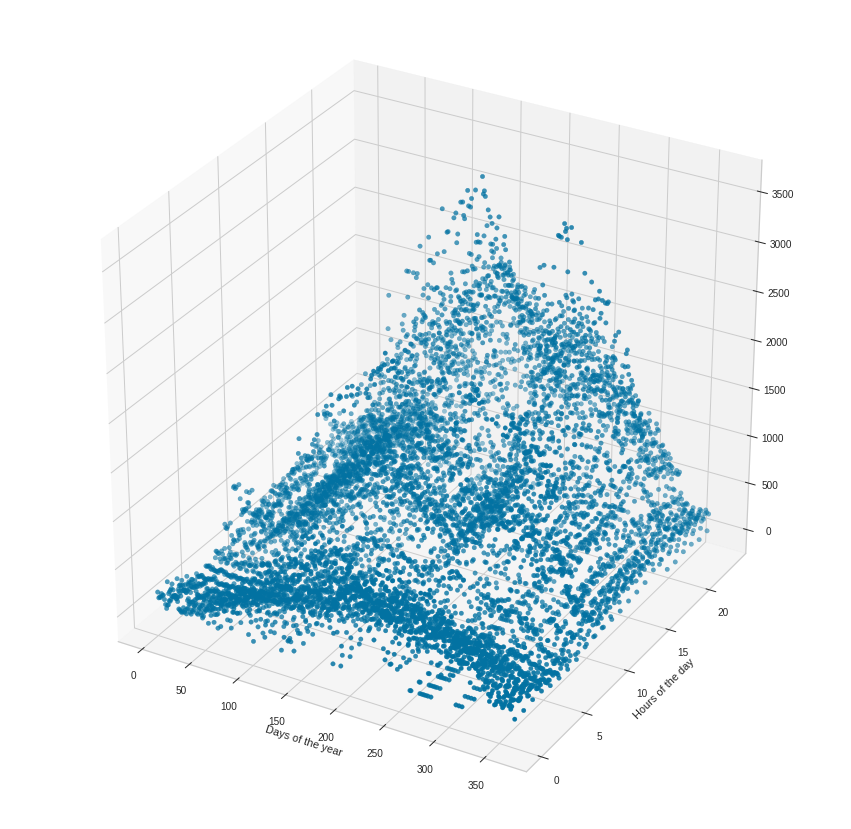

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5d6554d810>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5d6556c2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5d6554d250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d6556cd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d65564550>],
 'means': []}

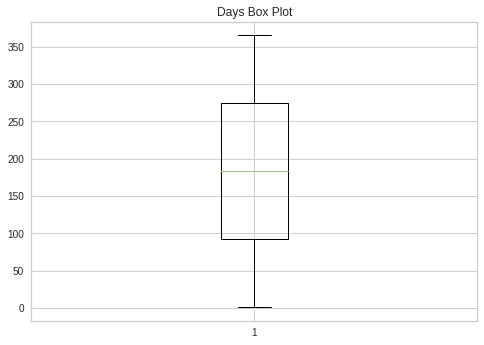

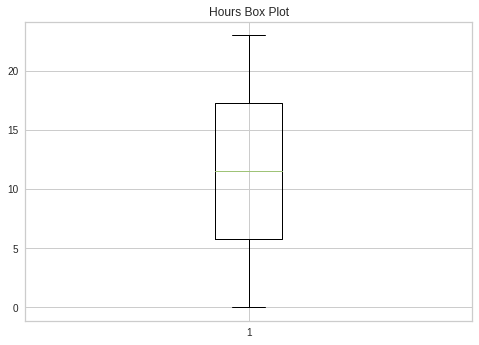

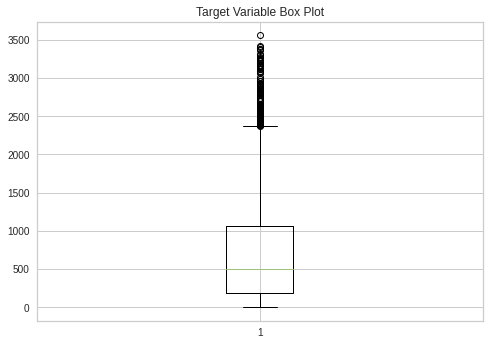

In [137]:
# Extract data for the 3D scatterplot
dates = df['Date']
x = list()
format = '%d/%m/%Y'
for d in dates:
  dayofyear = datetime.datetime.strptime(d, format)
  x.append(dayofyear.timetuple().tm_yday)
y = df['Hour']
z = df['Rented Bike Count']

# setup the figure and axes
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(x, y, z, cmap='Greens');

plt.xlabel("Days of the year")
plt.ylabel("Hours of the day")

plt.show()


fig1, ax1 = plt.subplots()
ax1.set_title('Days Box Plot')
ax1.boxplot(x)

fig1, ax1 = plt.subplots()
ax1.set_title('Hours Box Plot')
ax1.boxplot(y)

fig1, ax1 = plt.subplots()
ax1.set_title('Target Variable Box Plot')
ax1.boxplot(z)


In [139]:
# A function to be applied to all the numeric attributes which undergo the same analysis
def analyzeAttribute(attrib, df):
  attribute = attrib                            # The attribute to be analyzed
  data = df                                     # The data to analyze

  print(f"ANALYZING {attribute}:\n\n")

  sortedVals = data.sort_values(by=[attribute]) # Sorting the df for the attribute of interest
  uniqueVals = sortedVals[attribute].unique()   # Extracting the unique values of the attribute to check them visually
  print("Sorted values:")
  print(uniqueVals)

  vals = sortedVals[attribute]                  # Counting occurrences of all the values of the attribute
  valsCount = dict()
  for v in vals:
    if v in valsCount:
      valsCount[v] += 1
    else:
      valsCount[v] = 1

  print("Unique values frequency:")
  print(valsCount)

  fig = plt.figure(figsize=(30, 25))            # Plotting the occurrences as a barchar countplot to have a rough idea of the distribution
  y_pos = np.arange(len(valsCount))

  plt.bar(y_pos, valsCount.values(), align='center', width=0.3)
  plt.xticks(y_pos, valsCount.keys())

  plt.ylabel('#Occurrences')
  plt.xlabel(attribute)
  plt.title(f'{attribute} distribution')

  plt.show()
  

  fig1, ax1 = plt.subplots()                  # boxplot of the attribute of interest
  ax1.set_title(f'{attribute} Box Plot')
  ax1.boxplot(df[attribute])

  tot = 0                                      # Check the toal sums up to the df total instances
  for v in valsCount.values():
    tot += v
  if tot == data.shape[0]:
    print(f"{attribute} is OK\n\n")

  time.sleep(0.5)

ANALYZING Rented Bike Count:


Sorted values:
[   0    2    3 ... 3404 3418 3556]
Unique values frequency:
{0: 295, 2: 3, 3: 2, 4: 5, 5: 3, 6: 3, 7: 4, 8: 7, 9: 12, 10: 7, 11: 7, 12: 8, 13: 6, 14: 6, 15: 4, 16: 6, 17: 14, 18: 11, 19: 9, 20: 10, 21: 6, 22: 14, 23: 10, 24: 9, 25: 9, 26: 6, 27: 8, 28: 10, 29: 10, 30: 12, 31: 8, 32: 15, 33: 9, 34: 13, 35: 8, 36: 8, 37: 8, 38: 14, 39: 16, 40: 10, 41: 10, 42: 12, 43: 10, 44: 8, 45: 12, 46: 11, 47: 15, 48: 8, 49: 11, 50: 12, 51: 8, 52: 11, 53: 6, 54: 10, 55: 12, 56: 11, 57: 6, 58: 13, 59: 13, 60: 12, 61: 10, 62: 17, 63: 11, 64: 6, 65: 14, 66: 7, 67: 12, 68: 9, 69: 7, 70: 9, 71: 17, 72: 12, 73: 7, 74: 7, 75: 14, 76: 6, 77: 8, 78: 11, 79: 13, 80: 13, 81: 12, 82: 12, 83: 6, 84: 11, 85: 6, 86: 6, 87: 4, 88: 6, 89: 7, 90: 8, 91: 5, 92: 10, 93: 12, 94: 8, 95: 13, 96: 11, 97: 10, 98: 7, 99: 11, 100: 8, 101: 4, 102: 11, 103: 18, 104: 7, 105: 12, 106: 9, 107: 15, 108: 10, 109: 10, 110: 14, 111: 7, 112: 9, 113: 7, 114: 6, 115: 11, 116: 10, 117: 11, 118

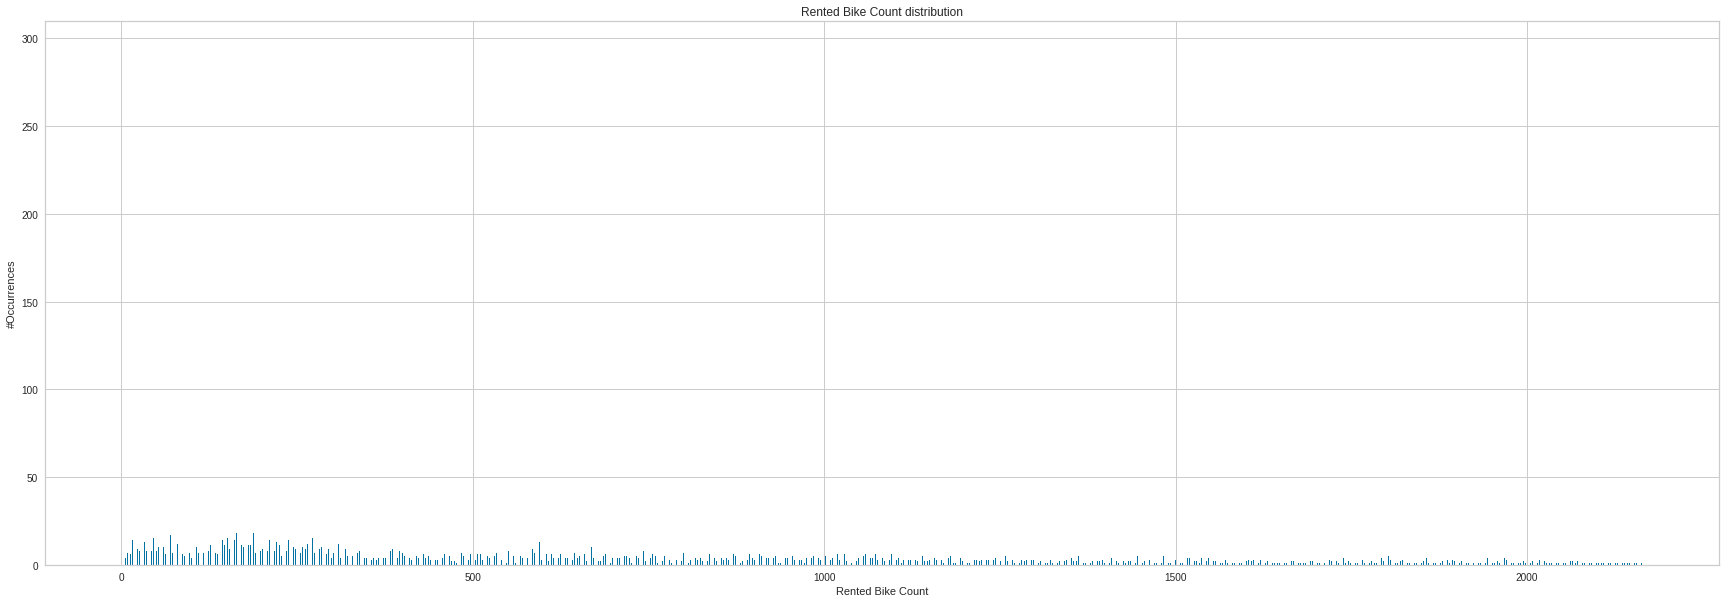

Rented Bike Count is OK


3.9099307159353347


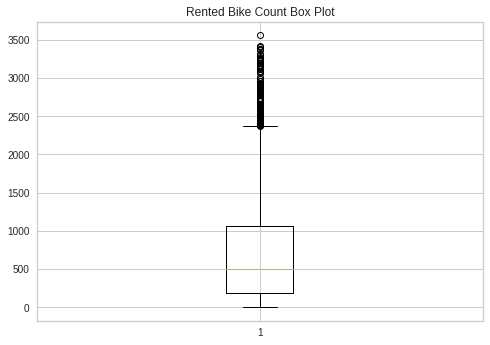

In [140]:
# Traget Var
attribute = "Rented Bike Count"               # The attribute to be analyzed
data = df                                     # The data to analyze

print(f"ANALYZING {attribute}:\n\n")

sortedVals = data.sort_values(by=[attribute]) # Sorting the df for the attribute of interest
uniqueVals = sortedVals[attribute].unique()   # Extracting the unique values of the attribute to check them visually
print("Sorted values:")
print(uniqueVals)

vals = sortedVals[attribute]                  # Counting occurrences of all the values of the attribute
valsCount = dict()
for v in vals:
  if v in valsCount:
    valsCount[v] += 1
  else:
    valsCount[v] = 1

print("Unique values frequency:")
print(valsCount)

fig = plt.figure(figsize=(30, 10))            # Plotting the occurrences as a barchar countplot to have a rough idea of the distribution
y_pos = np.arange(len(valsCount))

plt.bar(y_pos, valsCount.values(), align='center', width=0.3)
#x_pos = np.arange(0,valsCount.keys(len(valsCount.keys()-1)), 10)
plt.xticks()

plt.ylabel('#Occurrences')
plt.xlabel(attribute)
plt.title(f'{attribute} distribution')

plt.show()


fig1, ax1 = plt.subplots()                  # boxplot of the attribute of interest
ax1.set_title(f'{attribute} Box Plot')
ax1.boxplot(df[attribute])

tot = 0                                      # Check the toal sums up to the df total instances
for v in valsCount.values():
  tot += v
if tot == data.shape[0]:
  print(f"{attribute} is OK\n\n")

tot -= 295
tot/= (len(valsCount.values())-1)
print(tot)

In [141]:
# Extract all the attributes names and decide which one to analyze with the function previously defined
attributes = list()

for c in df.columns:
  attributes.append(c)

# excluding  'Date', 'Seasons', 'Holiday', 'Functioning Day' since they are categorical or strings
autoanalyze = list(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'])


print(attributes)
print(autoanalyze)

['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']
['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


ANALYZING Rented Bike Count:


Sorted values:
[   0    2    3 ... 3404 3418 3556]
Unique values frequency:
{0: 295, 2: 3, 3: 2, 4: 5, 5: 3, 6: 3, 7: 4, 8: 7, 9: 12, 10: 7, 11: 7, 12: 8, 13: 6, 14: 6, 15: 4, 16: 6, 17: 14, 18: 11, 19: 9, 20: 10, 21: 6, 22: 14, 23: 10, 24: 9, 25: 9, 26: 6, 27: 8, 28: 10, 29: 10, 30: 12, 31: 8, 32: 15, 33: 9, 34: 13, 35: 8, 36: 8, 37: 8, 38: 14, 39: 16, 40: 10, 41: 10, 42: 12, 43: 10, 44: 8, 45: 12, 46: 11, 47: 15, 48: 8, 49: 11, 50: 12, 51: 8, 52: 11, 53: 6, 54: 10, 55: 12, 56: 11, 57: 6, 58: 13, 59: 13, 60: 12, 61: 10, 62: 17, 63: 11, 64: 6, 65: 14, 66: 7, 67: 12, 68: 9, 69: 7, 70: 9, 71: 17, 72: 12, 73: 7, 74: 7, 75: 14, 76: 6, 77: 8, 78: 11, 79: 13, 80: 13, 81: 12, 82: 12, 83: 6, 84: 11, 85: 6, 86: 6, 87: 4, 88: 6, 89: 7, 90: 8, 91: 5, 92: 10, 93: 12, 94: 8, 95: 13, 96: 11, 97: 10, 98: 7, 99: 11, 100: 8, 101: 4, 102: 11, 103: 18, 104: 7, 105: 12, 106: 9, 107: 15, 108: 10, 109: 10, 110: 14, 111: 7, 112: 9, 113: 7, 114: 6, 115: 11, 116: 10, 117: 11, 118

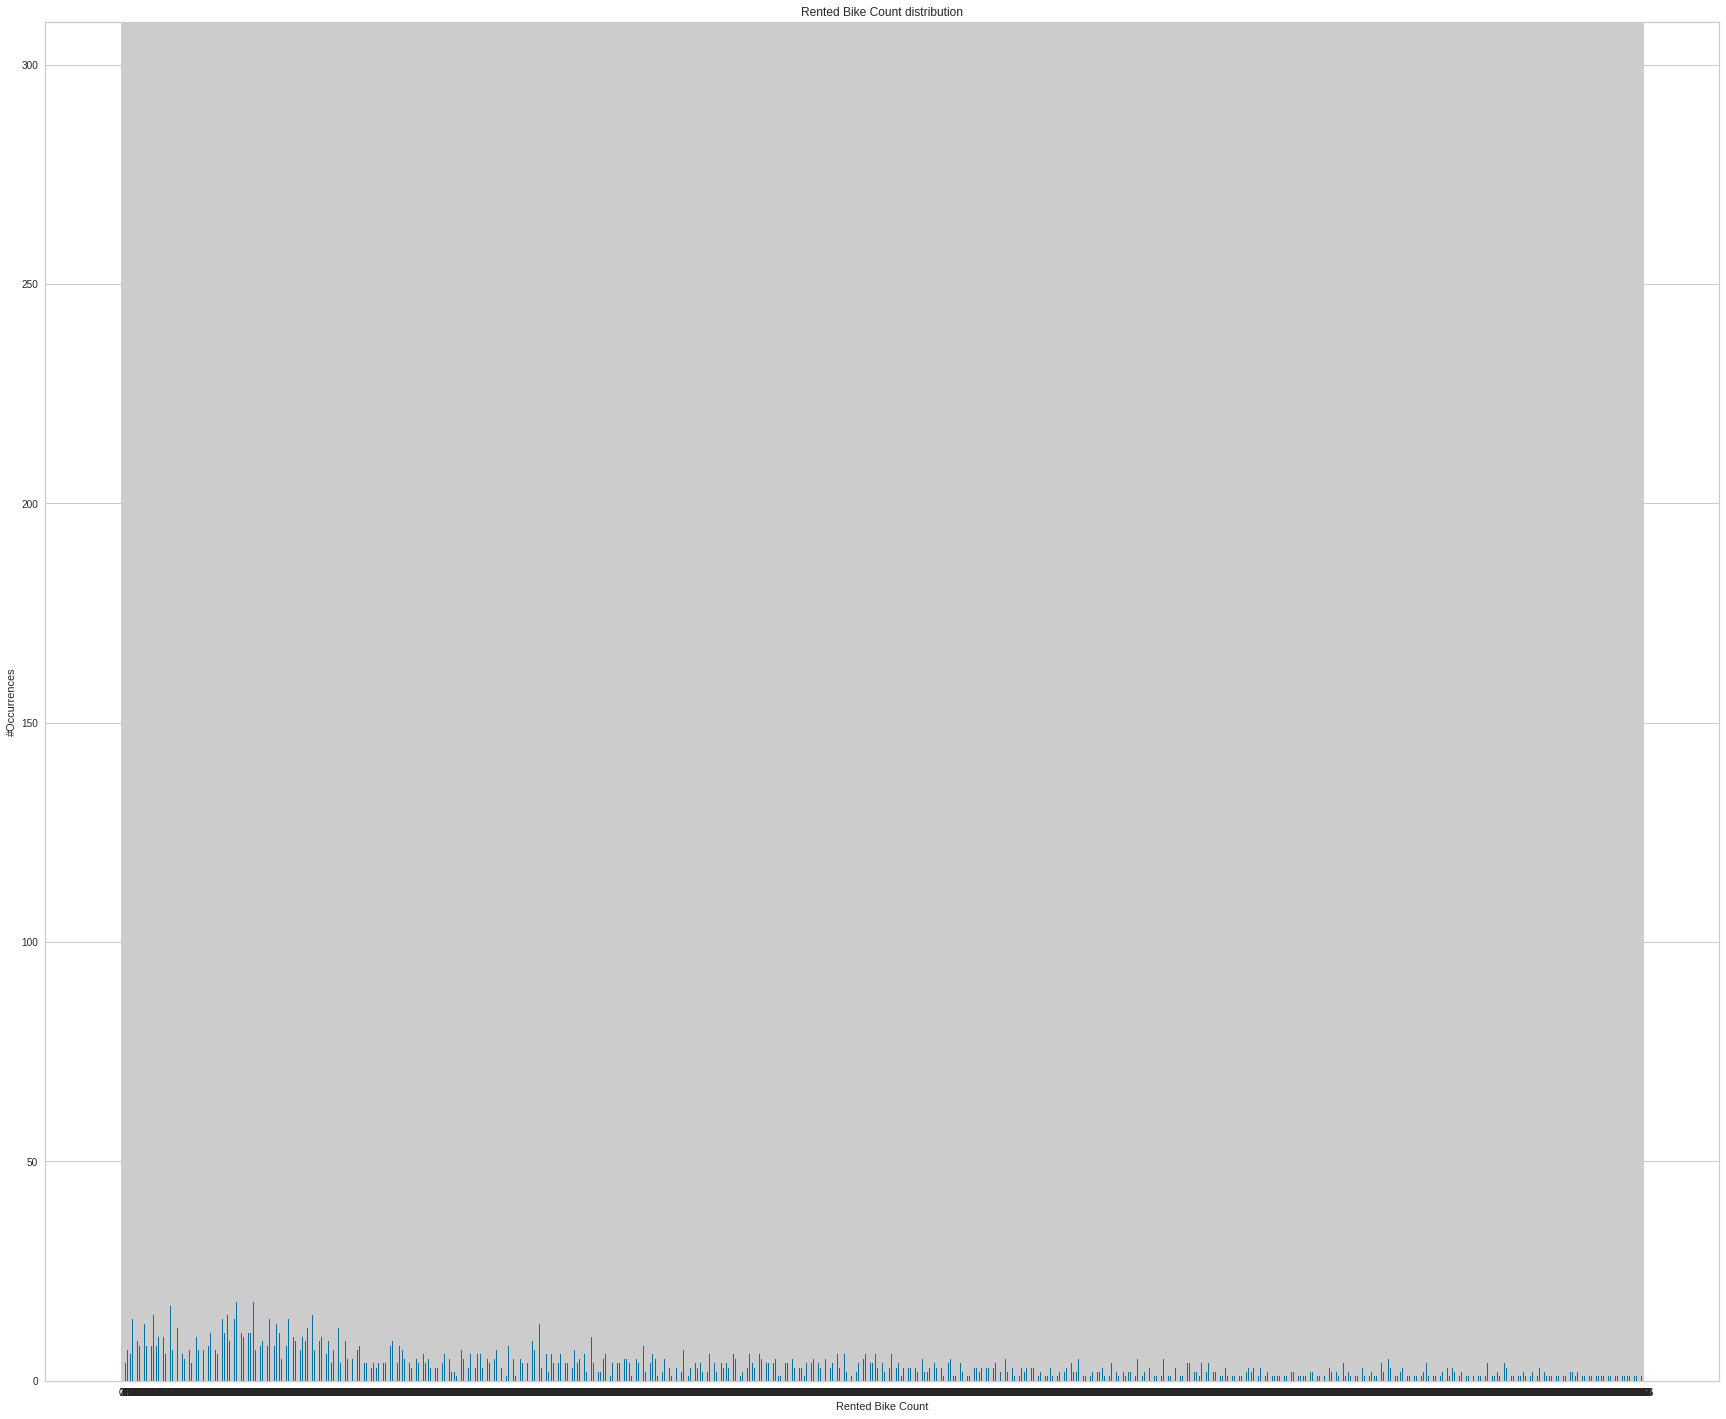

Rented Bike Count is OK


ANALYZING Hour:


Sorted values:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values frequency:
{0: 365, 1: 365, 2: 365, 3: 365, 4: 365, 5: 365, 6: 365, 7: 365, 8: 365, 9: 365, 10: 365, 11: 365, 12: 365, 13: 365, 14: 365, 15: 365, 16: 365, 17: 365, 18: 365, 19: 365, 20: 365, 21: 365, 22: 365, 23: 365}


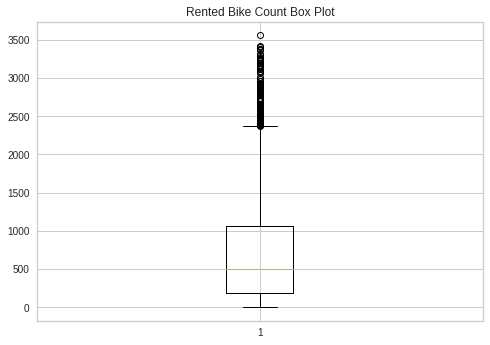

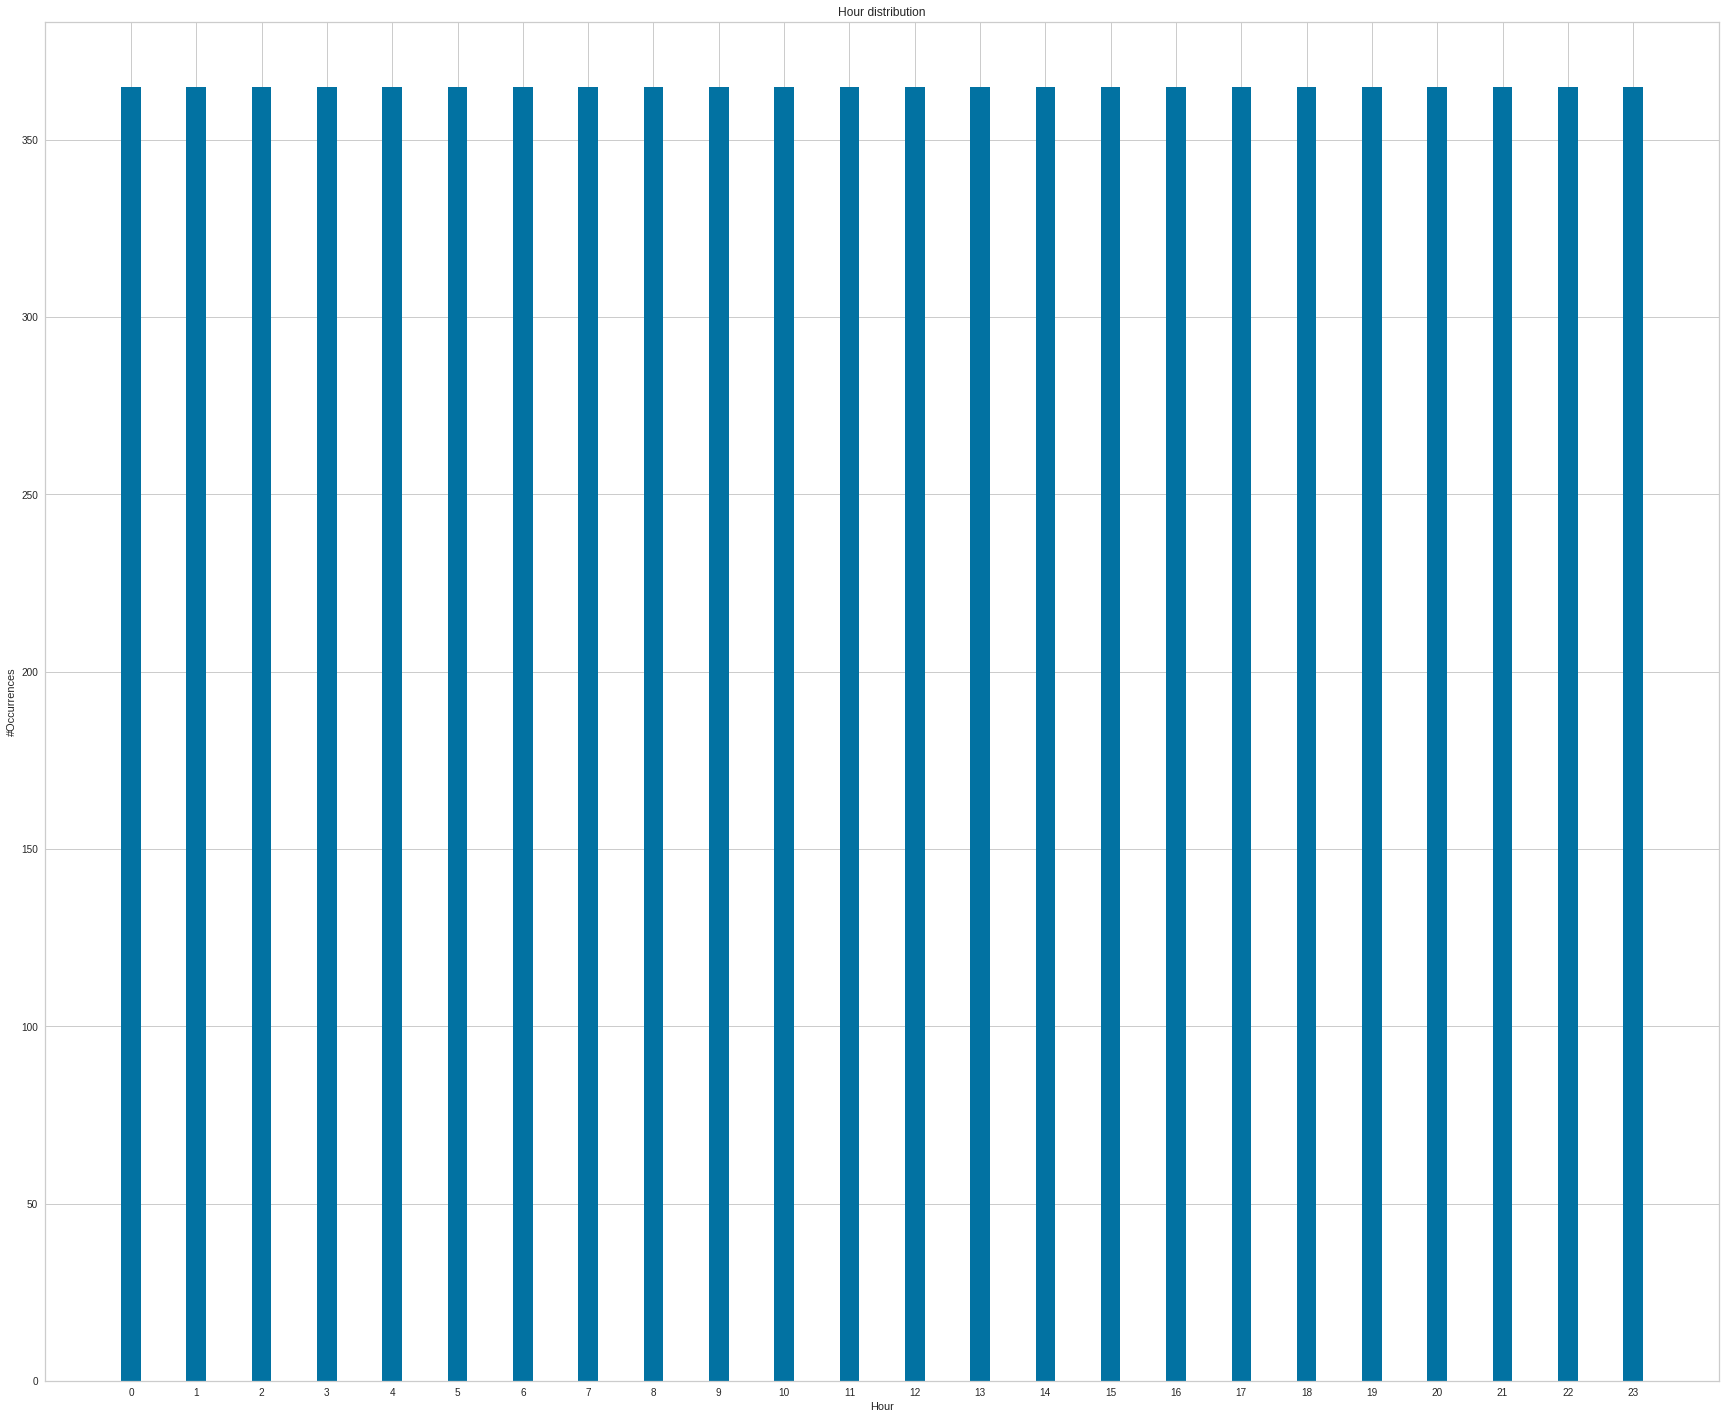

Hour is OK


ANALYZING Temperature(°C):


Sorted values:
[-17.8 -17.5 -17.4 -16.9 -16.5 -16.4 -16.2 -16.1 -16.  -15.9 -15.8 -15.7
 -15.6 -15.4 -15.3 -15.2 -15.1 -15.  -14.9 -14.7 -14.6 -14.5 -14.4 -14.3
 -14.1 -13.9 -13.8 -13.7 -13.6 -13.5 -13.3 -13.2 -13.1 -13.  -12.9 -12.8
 -12.7 -12.6 -12.5 -12.4 -12.3 -12.2 -12.1 -12.  -11.9 -11.8 -11.7 -11.6
 -11.5 -11.4 -11.3 -11.2 -11.1 -11.  -10.9 -10.8 -10.7 -10.6 -10.5 -10.4
 -10.3 -10.2 -10.1 -10.   -9.9  -9.8  -9.7  -9.6  -9.5  -9.4  -9.3  -9.2
  -9.1  -9.   -8.9  -8.8  -8.7  -8.6  -8.5  -8.4  -8.3  -8.2  -8.1  -8.
  -7.9  -7.8  -7.7  -7.6  -7.5  -7.4  -7.3  -7.2  -7.1  -7.   -6.9  -6.8
  -6.7  -6.6  -6.5  -6.4  -6.3  -6.2  -6.1  -6.   -5.9  -5.8  -5.7  -5.6
  -5.5  -5.4  -5.3  -5.2  -5.1  -5.   -4.9  -4.8  -4.7  -4.6  -4.5  -4.4
  -4.3  -4.2  -4.1  -4.   -3.9  -3.8  -3.7  -3.6  -3.5  -3.4  -3.3  -3.2
  -3.1  -3.   -2.9  -2.8  -2.7  -2.6  -2.5  -2.4  -2.3  -2.2  -2.1  -2.
  -1.9  -1.8  -1.7  -1.6  -1.5  -1.4  -1.3  -1.2  -1.1  -1.   -0.9  -

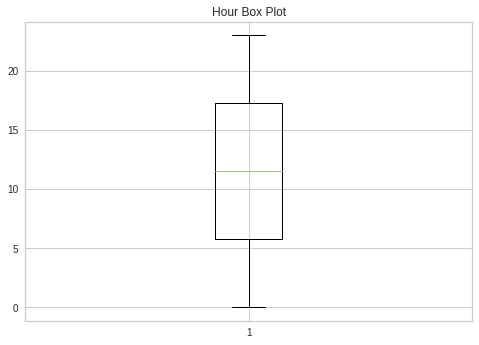

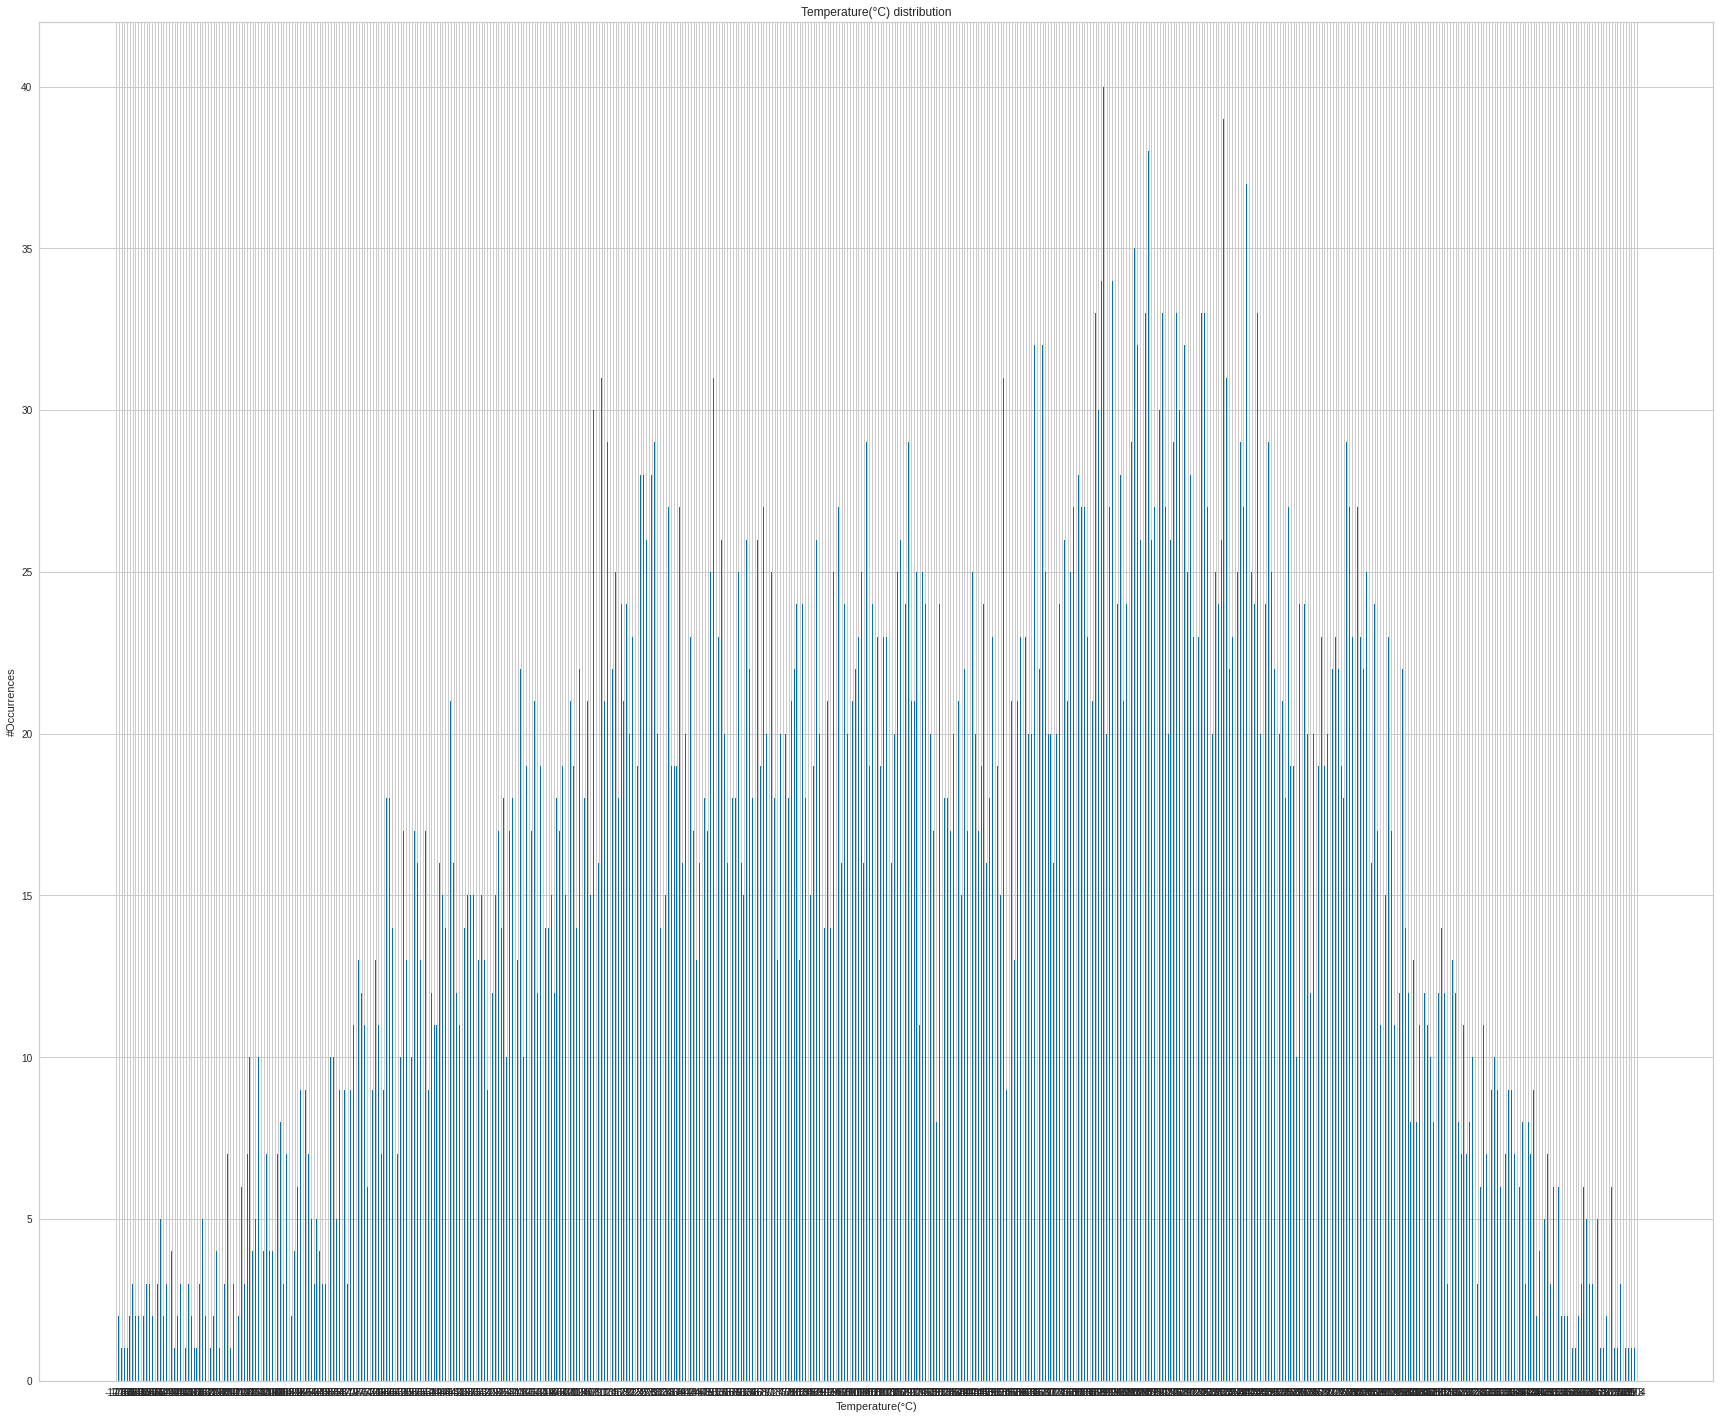

Temperature(°C) is OK


ANALYZING Humidity(%):


Sorted values:
[ 0 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
Unique values frequency:
{0: 17, 10: 1, 11: 1, 12: 1, 13: 3, 14: 16, 15: 17, 16: 15, 17: 21, 18: 15, 19: 11, 20: 24, 21: 24, 22: 30, 23: 48, 24: 43, 25: 59, 26: 71, 27: 71, 28: 89, 29: 64, 30: 94, 31: 113, 32: 111, 33: 127, 34: 130, 35: 122, 36: 110, 37: 117, 38: 121, 39: 134, 40: 132, 41: 118, 42: 127, 43: 164, 44: 148, 45: 142, 46: 127, 47: 156, 48: 123, 49: 139, 50: 140, 51: 155, 52: 150, 53: 173, 54: 151, 55: 145, 56: 157, 57: 159, 58: 135, 59: 139, 60: 145, 61: 110, 62: 142, 63: 153, 64: 139, 65: 136, 66: 132, 67: 122, 68: 118, 69: 125, 70: 126, 71: 108, 72: 120, 73: 130, 74: 114, 75: 102, 76: 111, 77: 102, 78: 111, 79: 97, 80: 101, 81: 119, 82: 12

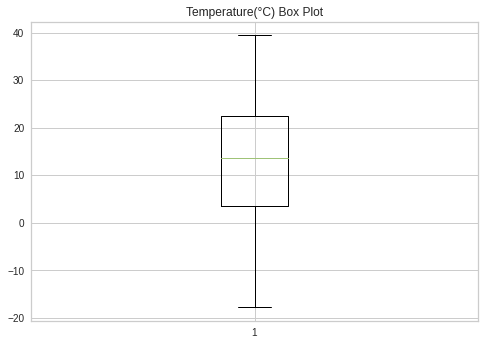

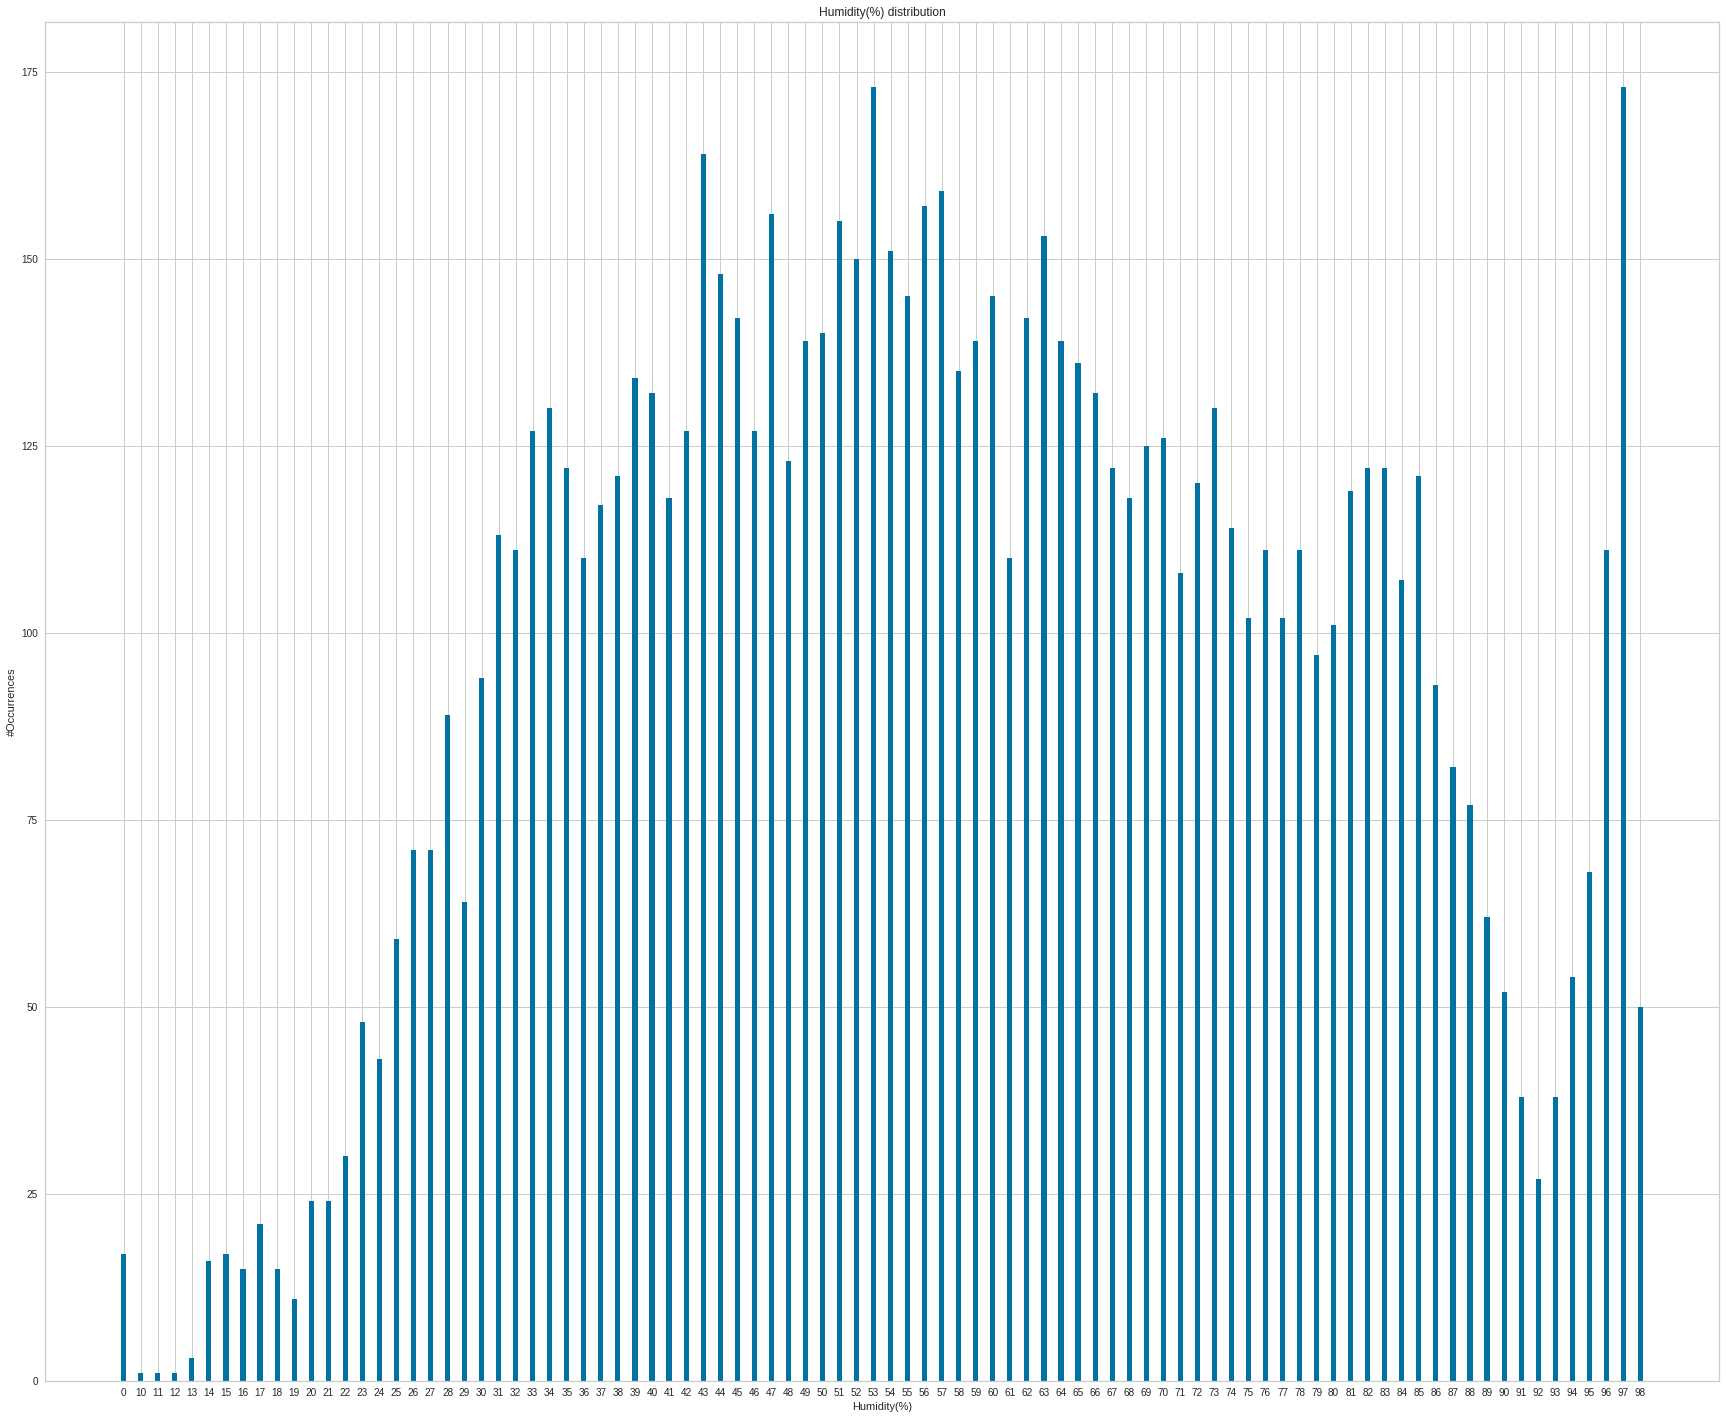

Humidity(%) is OK


ANALYZING Wind speed (m/s):


Sorted values:
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.6 5.7 5.8 6.  6.1 6.7 6.9 7.2 7.3 7.4]
Unique values frequency:
{0.0: 74, 0.1: 49, 0.2: 86, 0.3: 158, 0.4: 186, 0.5: 258, 0.6: 321, 0.7: 313, 0.8: 385, 0.9: 388, 1.0: 388, 1.1: 420, 1.2: 403, 1.3: 344, 1.4: 355, 1.5: 343, 1.6: 332, 1.7: 320, 1.8: 289, 1.9: 227, 2.0: 281, 2.1: 226, 2.2: 229, 2.3: 217, 2.4: 193, 2.5: 177, 2.6: 181, 2.7: 159, 2.8: 159, 2.9: 145, 3.0: 115, 3.1: 124, 3.2: 114, 3.3: 100, 3.4: 85, 3.5: 79, 3.6: 58, 3.7: 73, 3.8: 55, 3.9: 45, 4.0: 47, 4.1: 39, 4.2: 26, 4.3: 33, 4.4: 17, 4.5: 25, 4.6: 21, 4.7: 23, 4.8: 12, 4.9: 15, 5.0: 13, 5.1: 7, 5.2: 2, 5.3: 8, 5.4: 3, 5.6: 2, 5.7: 1, 5.8: 4, 6.0: 2, 6.1: 1, 6.7: 1, 6.9: 1, 7.2: 1, 7.3: 1, 7.4: 1}


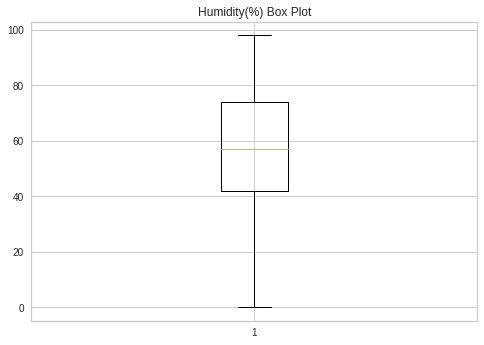

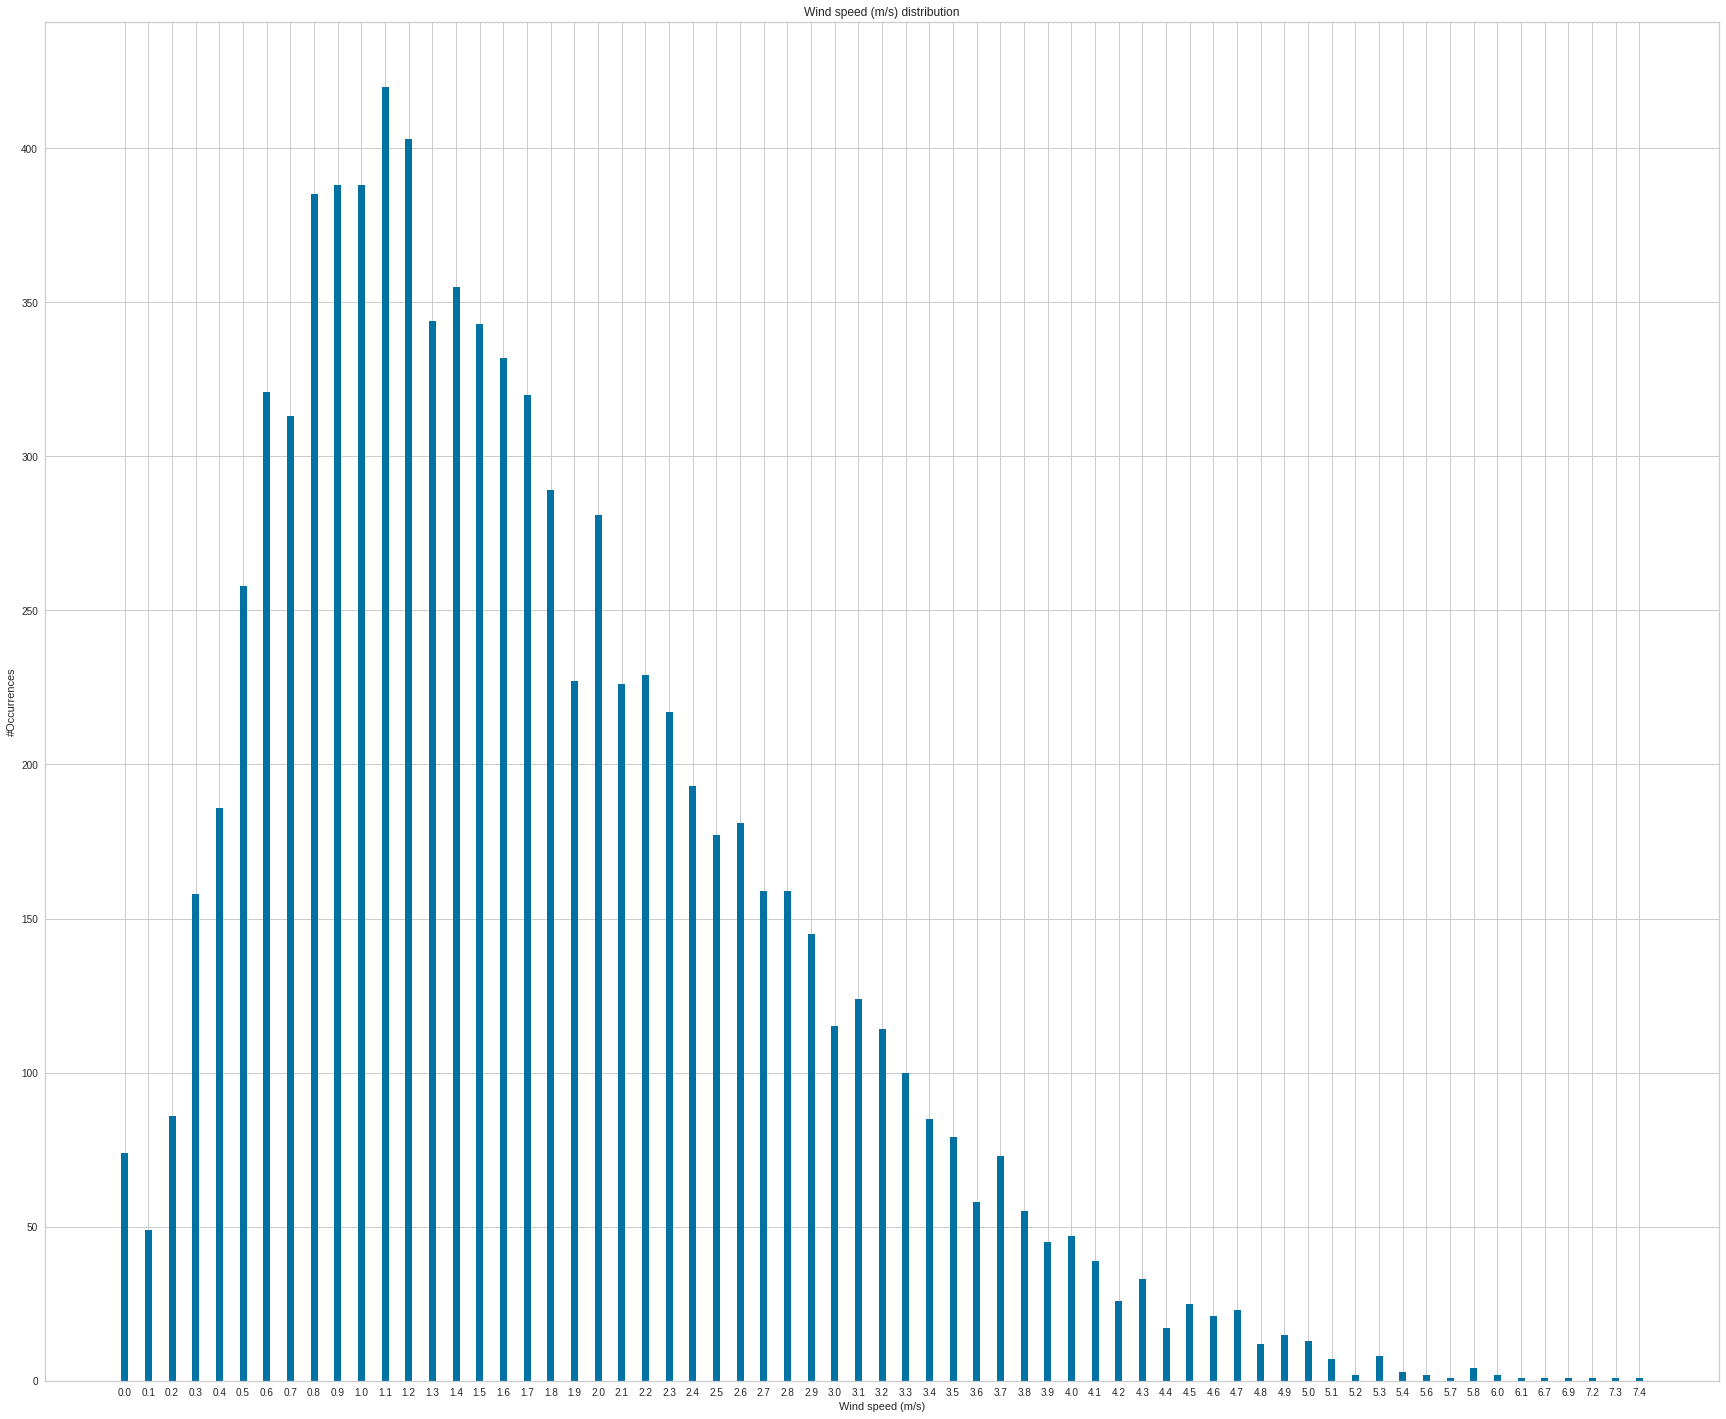

Wind speed (m/s) is OK


ANALYZING Visibility (10m):


Sorted values:
[  27   33   34 ... 1998 1999 2000]
Unique values frequency:
{27: 1, 33: 1, 34: 1, 38: 1, 53: 1, 54: 1, 59: 1, 63: 1, 66: 2, 70: 1, 72: 1, 73: 1, 77: 2, 79: 1, 80: 1, 81: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 94: 3, 95: 1, 96: 1, 100: 1, 102: 1, 103: 1, 105: 3, 109: 1, 110: 1, 113: 1, 116: 1, 117: 3, 118: 1, 119: 1, 121: 1, 122: 1, 124: 1, 125: 1, 129: 2, 130: 1, 135: 1, 137: 2, 140: 1, 141: 1, 143: 2, 145: 1, 147: 1, 148: 2, 152: 4, 153: 1, 155: 2, 156: 2, 157: 1, 158: 1, 159: 2, 160: 1, 163: 1, 164: 1, 166: 2, 167: 2, 168: 2, 171: 1, 172: 1, 173: 4, 174: 1, 175: 2, 176: 1, 177: 1, 178: 3, 179: 4, 180: 3, 181: 2, 182: 1, 183: 2, 184: 2, 185: 3, 186: 3, 187: 3, 188: 1, 189: 3, 190: 3, 191: 3, 192: 2, 193: 4, 194: 3, 196: 7, 197: 5, 198: 4, 199: 1, 200: 5, 201: 3, 202: 2, 203: 4, 206: 3, 207: 3, 208: 1, 209: 3, 210: 2, 211: 3, 212: 2, 213: 2, 214: 2, 215: 1, 216: 3, 217: 2, 218: 3, 219: 3, 220: 1, 221: 3, 222: 6, 223:

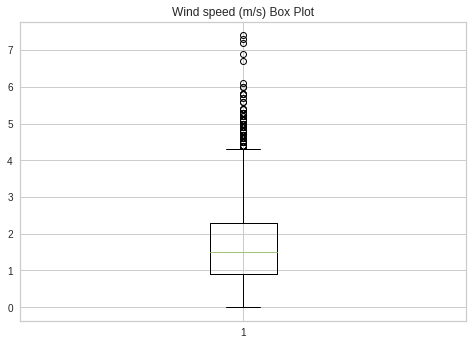

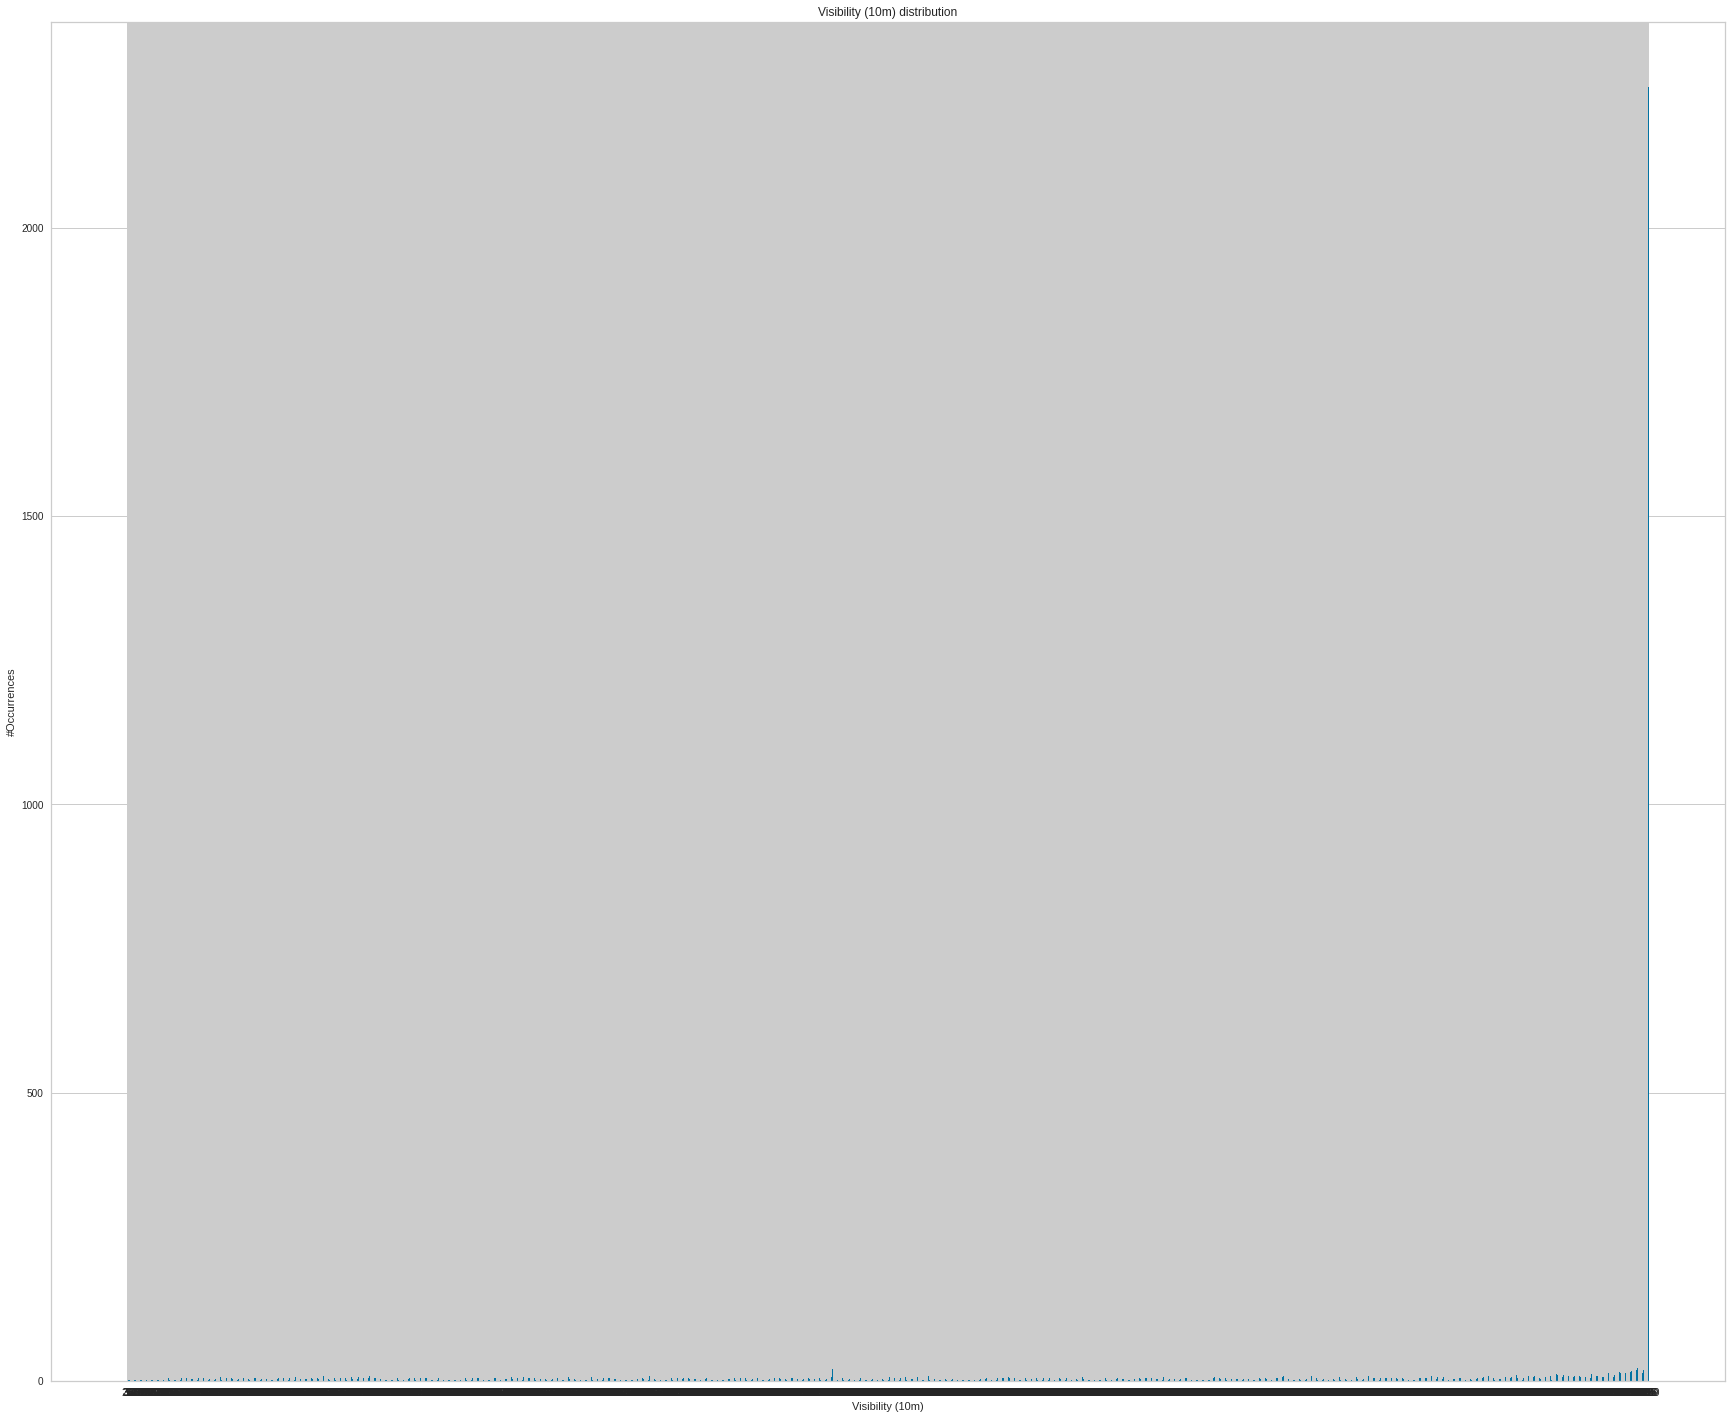

Visibility (10m) is OK


ANALYZING Dew point temperature(°C):


Sorted values:
[-30.6 -30.5 -29.8 -29.7 -29.6 -29.5 -29.2 -29.1 -29.  -28.9 -28.7 -28.4
 -28.3 -28.2 -28.1 -28.  -27.9 -27.8 -27.7 -27.6 -27.4 -27.3 -27.2 -27.1
 -27.  -26.9 -26.8 -26.7 -26.6 -26.5 -26.3 -26.2 -26.1 -26.  -25.9 -25.8
 -25.6 -25.5 -25.4 -25.3 -25.2 -25.1 -25.  -24.9 -24.8 -24.7 -24.6 -24.4
 -24.2 -24.1 -24.  -23.9 -23.8 -23.7 -23.6 -23.5 -23.4 -23.3 -23.2 -23.1
 -23.  -22.9 -22.8 -22.7 -22.6 -22.5 -22.4 -22.3 -22.2 -22.1 -22.  -21.9
 -21.8 -21.7 -21.6 -21.5 -21.4 -21.3 -21.2 -21.1 -21.  -20.9 -20.8 -20.7
 -20.6 -20.5 -20.4 -20.3 -20.2 -20.1 -20.  -19.9 -19.8 -19.7 -19.6 -19.5
 -19.4 -19.3 -19.2 -19.1 -19.  -18.9 -18.8 -18.7 -18.6 -18.5 -18.4 -18.3
 -18.2 -18.1 -18.  -17.9 -17.8 -17.7 -17.6 -17.5 -17.4 -17.3 -17.2 -17.1
 -17.  -16.9 -16.8 -16.7 -16.6 -16.5 -16.4 -16.3 -16.2 -16.1 -16.  -15.9
 -15.8 -15.7 -15.6 -15.5 -15.4 -15.3 -15.2 -15.1 -15.  -14.9 -14.8 -14.7
 -14.6 -14.5 -14.4 -14.3 -14.2 -14.1 -14.  -1

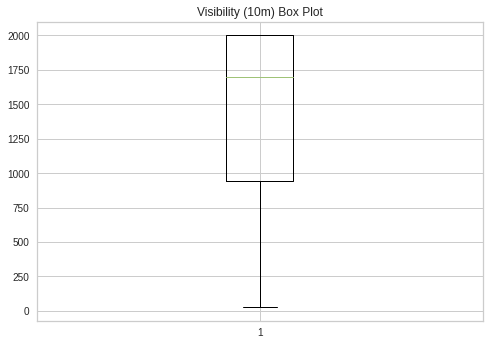

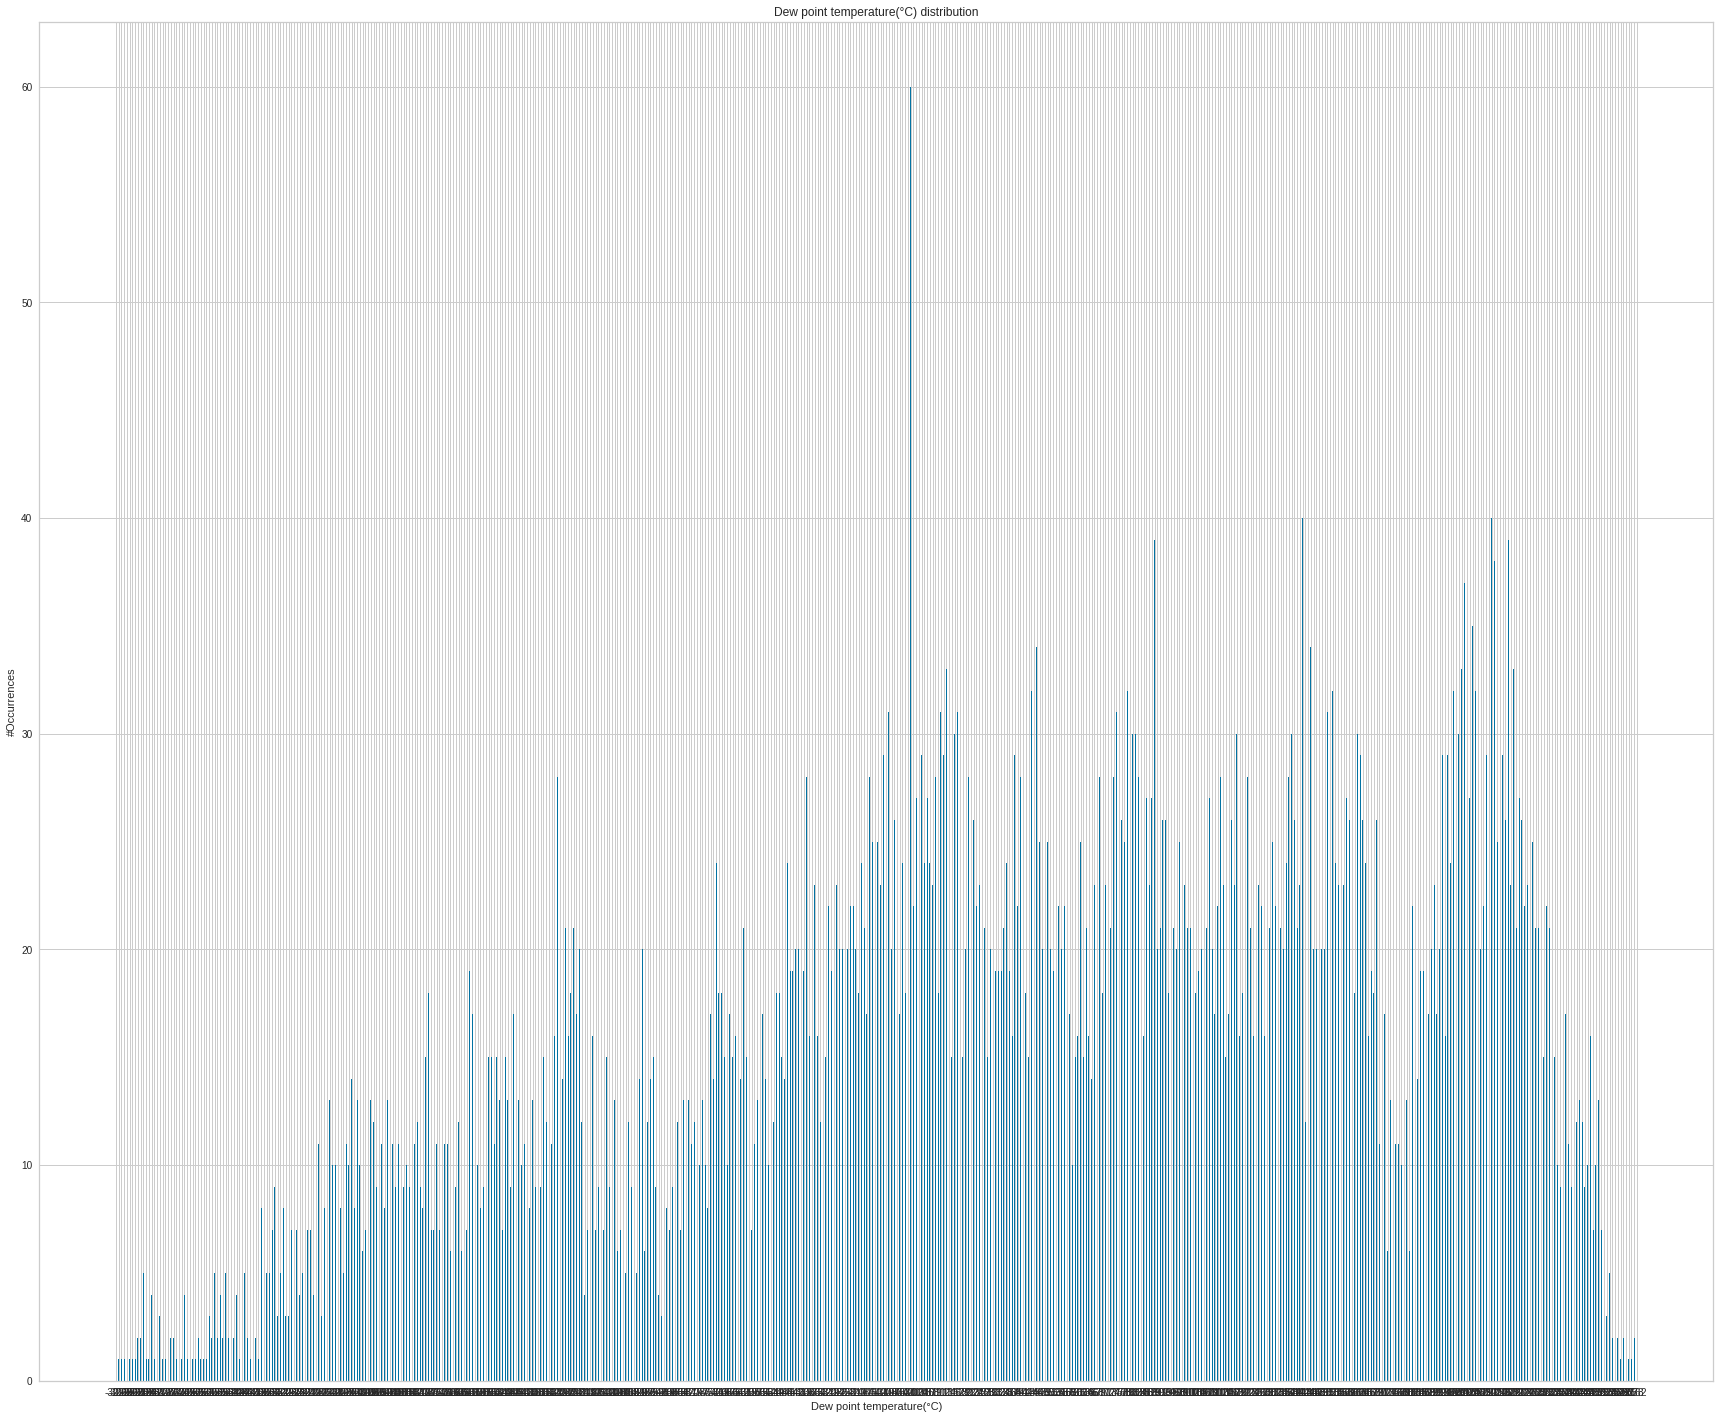

Dew point temperature(°C) is OK


ANALYZING Solar Radiation (MJ/m2):


Sorted values:
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1

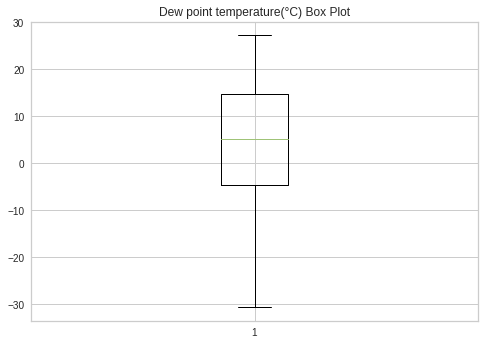

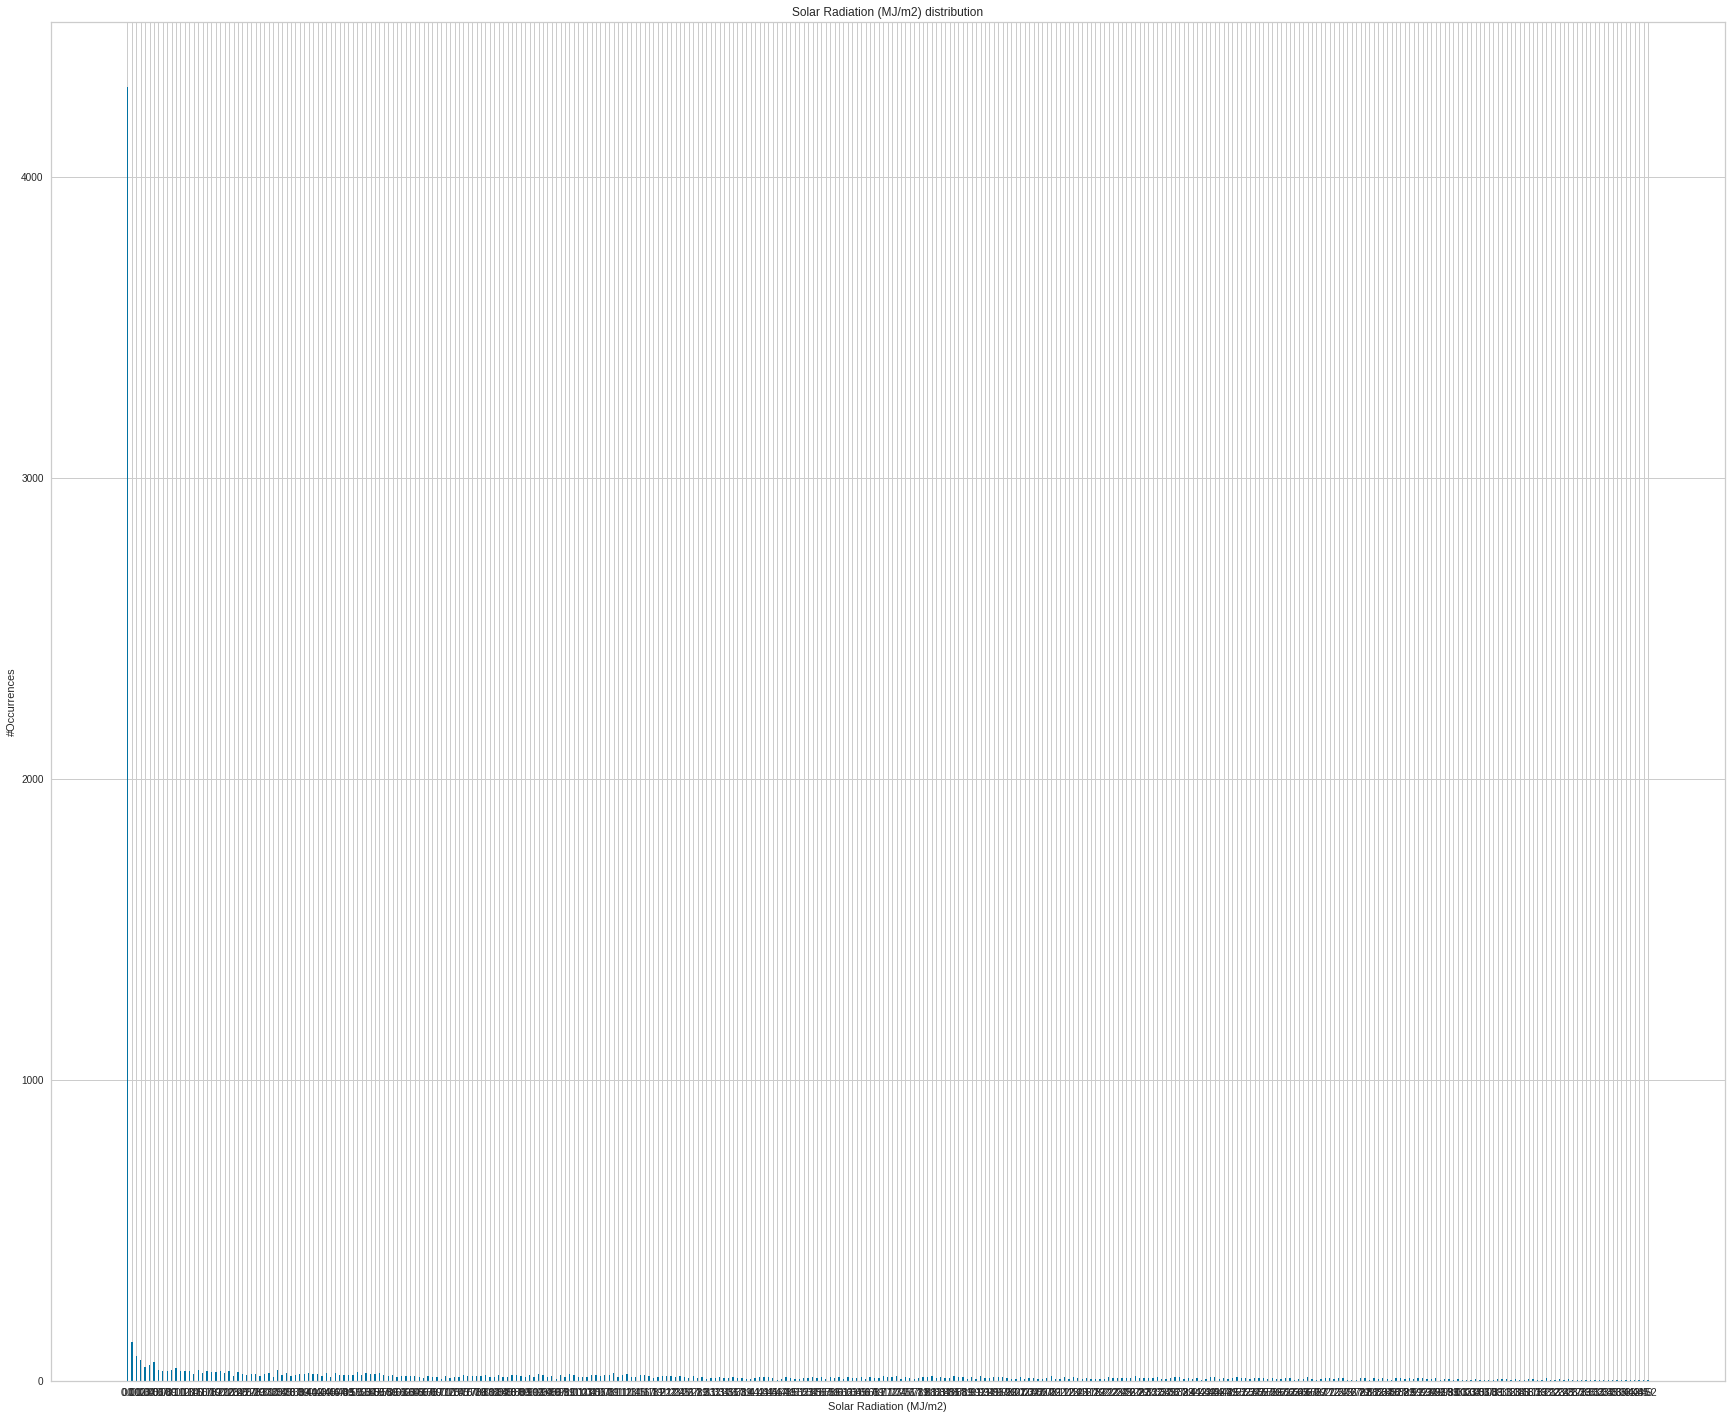

Solar Radiation (MJ/m2) is OK


ANALYZING Rainfall(mm):


Sorted values:
[ 0.   0.1  0.2  0.3  0.4  0.5  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.8  1.9  2.   2.4  2.5  3.   3.3  3.5  3.7  4.   4.5  4.9
  5.   5.4  5.5  6.   6.4  6.5  7.   7.3  7.5  8.   8.5  9.   9.1  9.5
 10.  10.5 11.5 12.  12.5 13.  13.5 14.5 15.5 16.  17.  18.  18.5 19.
 21.  21.5 24.  29.5 35. ]
Unique values frequency:
{0.0: 8232, 0.1: 46, 0.2: 20, 0.3: 9, 0.4: 16, 0.5: 116, 0.7: 1, 0.8: 3, 0.9: 3, 1.0: 66, 1.1: 2, 1.2: 1, 1.3: 1, 1.4: 1, 1.5: 56, 1.6: 3, 1.8: 1, 1.9: 1, 2.0: 31, 2.4: 1, 2.5: 23, 3.0: 14, 3.3: 1, 3.5: 18, 3.7: 1, 4.0: 14, 4.5: 7, 4.9: 1, 5.0: 5, 5.4: 1, 5.5: 8, 6.0: 6, 6.4: 2, 6.5: 5, 7.0: 3, 7.3: 1, 7.5: 1, 8.0: 3, 8.5: 2, 9.0: 4, 9.1: 1, 9.5: 6, 10.0: 1, 10.5: 1, 11.5: 1, 12.0: 1, 12.5: 1, 13.0: 2, 13.5: 2, 14.5: 1, 15.5: 1, 16.0: 1, 17.0: 1, 18.0: 2, 18.5: 2, 19.0: 1, 21.0: 1, 21.5: 1, 24.0: 1, 29.5: 1, 35.0: 1}


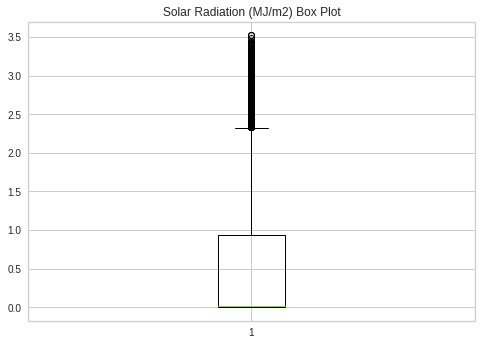

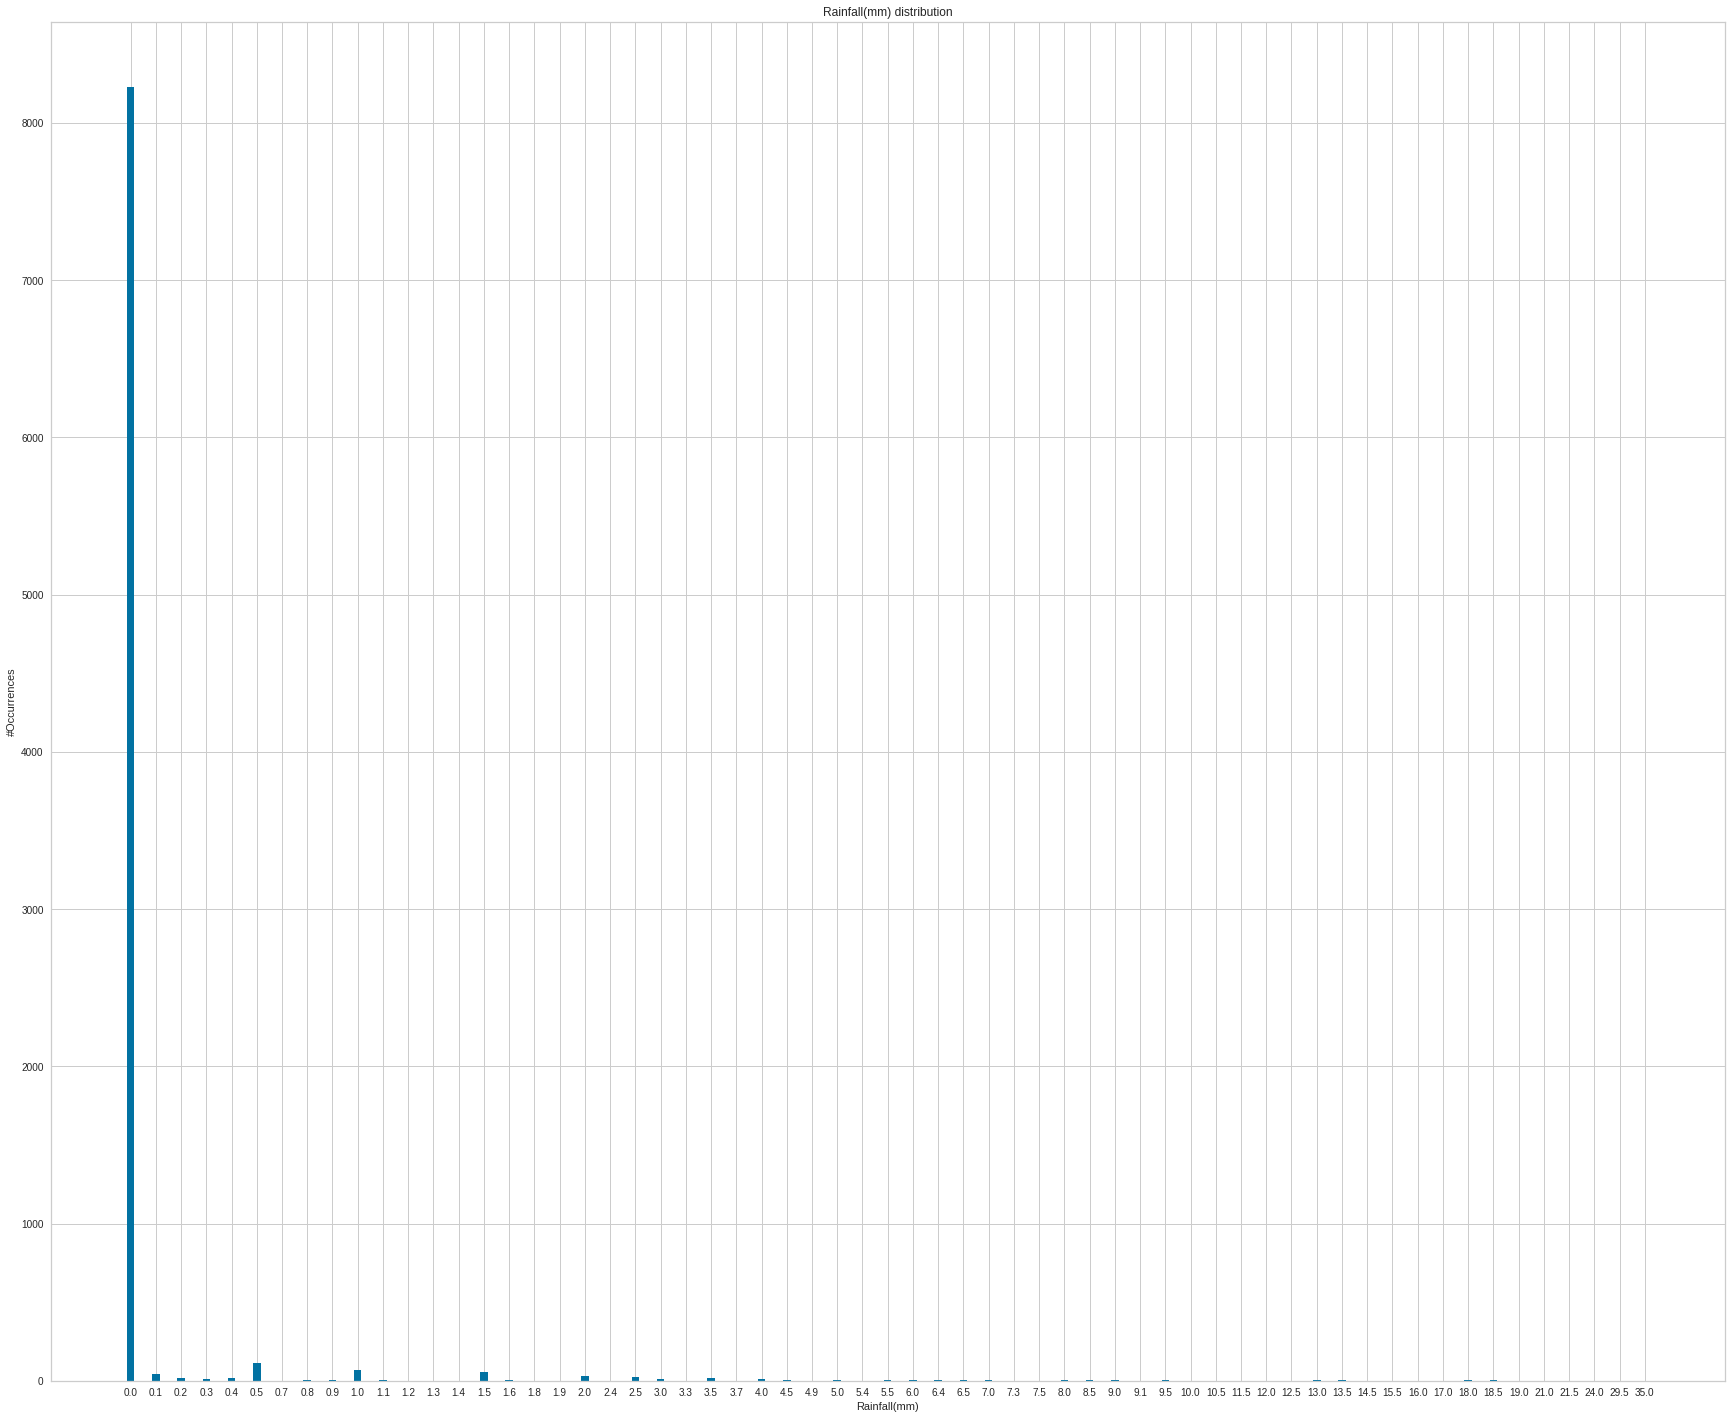

Rainfall(mm) is OK


ANALYZING Snowfall (cm):


Sorted values:
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.8 5.  5.1 6.  7.  7.1 8.8]
Unique values frequency:
{0.0: 8317, 0.1: 2, 0.2: 15, 0.3: 42, 0.4: 21, 0.5: 34, 0.6: 15, 0.7: 31, 0.8: 22, 0.9: 34, 1.0: 39, 1.1: 3, 1.2: 8, 1.3: 4, 1.4: 2, 1.5: 1, 1.6: 19, 1.7: 3, 1.8: 5, 1.9: 3, 2.0: 22, 2.1: 3, 2.2: 18, 2.3: 3, 2.4: 3, 2.5: 10, 2.6: 12, 2.7: 6, 2.8: 2, 2.9: 2, 3.0: 5, 3.1: 1, 3.2: 4, 3.3: 3, 3.4: 2, 3.5: 14, 3.6: 1, 3.7: 3, 3.8: 3, 3.9: 2, 4.0: 4, 4.1: 4, 4.2: 1, 4.3: 2, 4.8: 2, 5.0: 2, 5.1: 1, 6.0: 1, 7.0: 1, 7.1: 1, 8.8: 2}


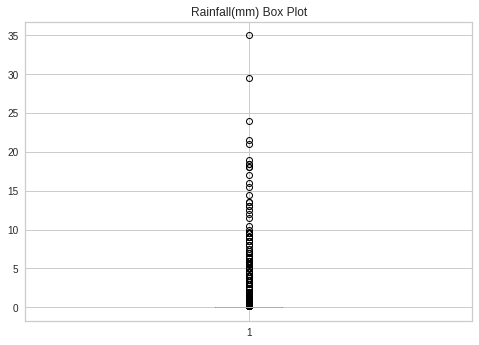

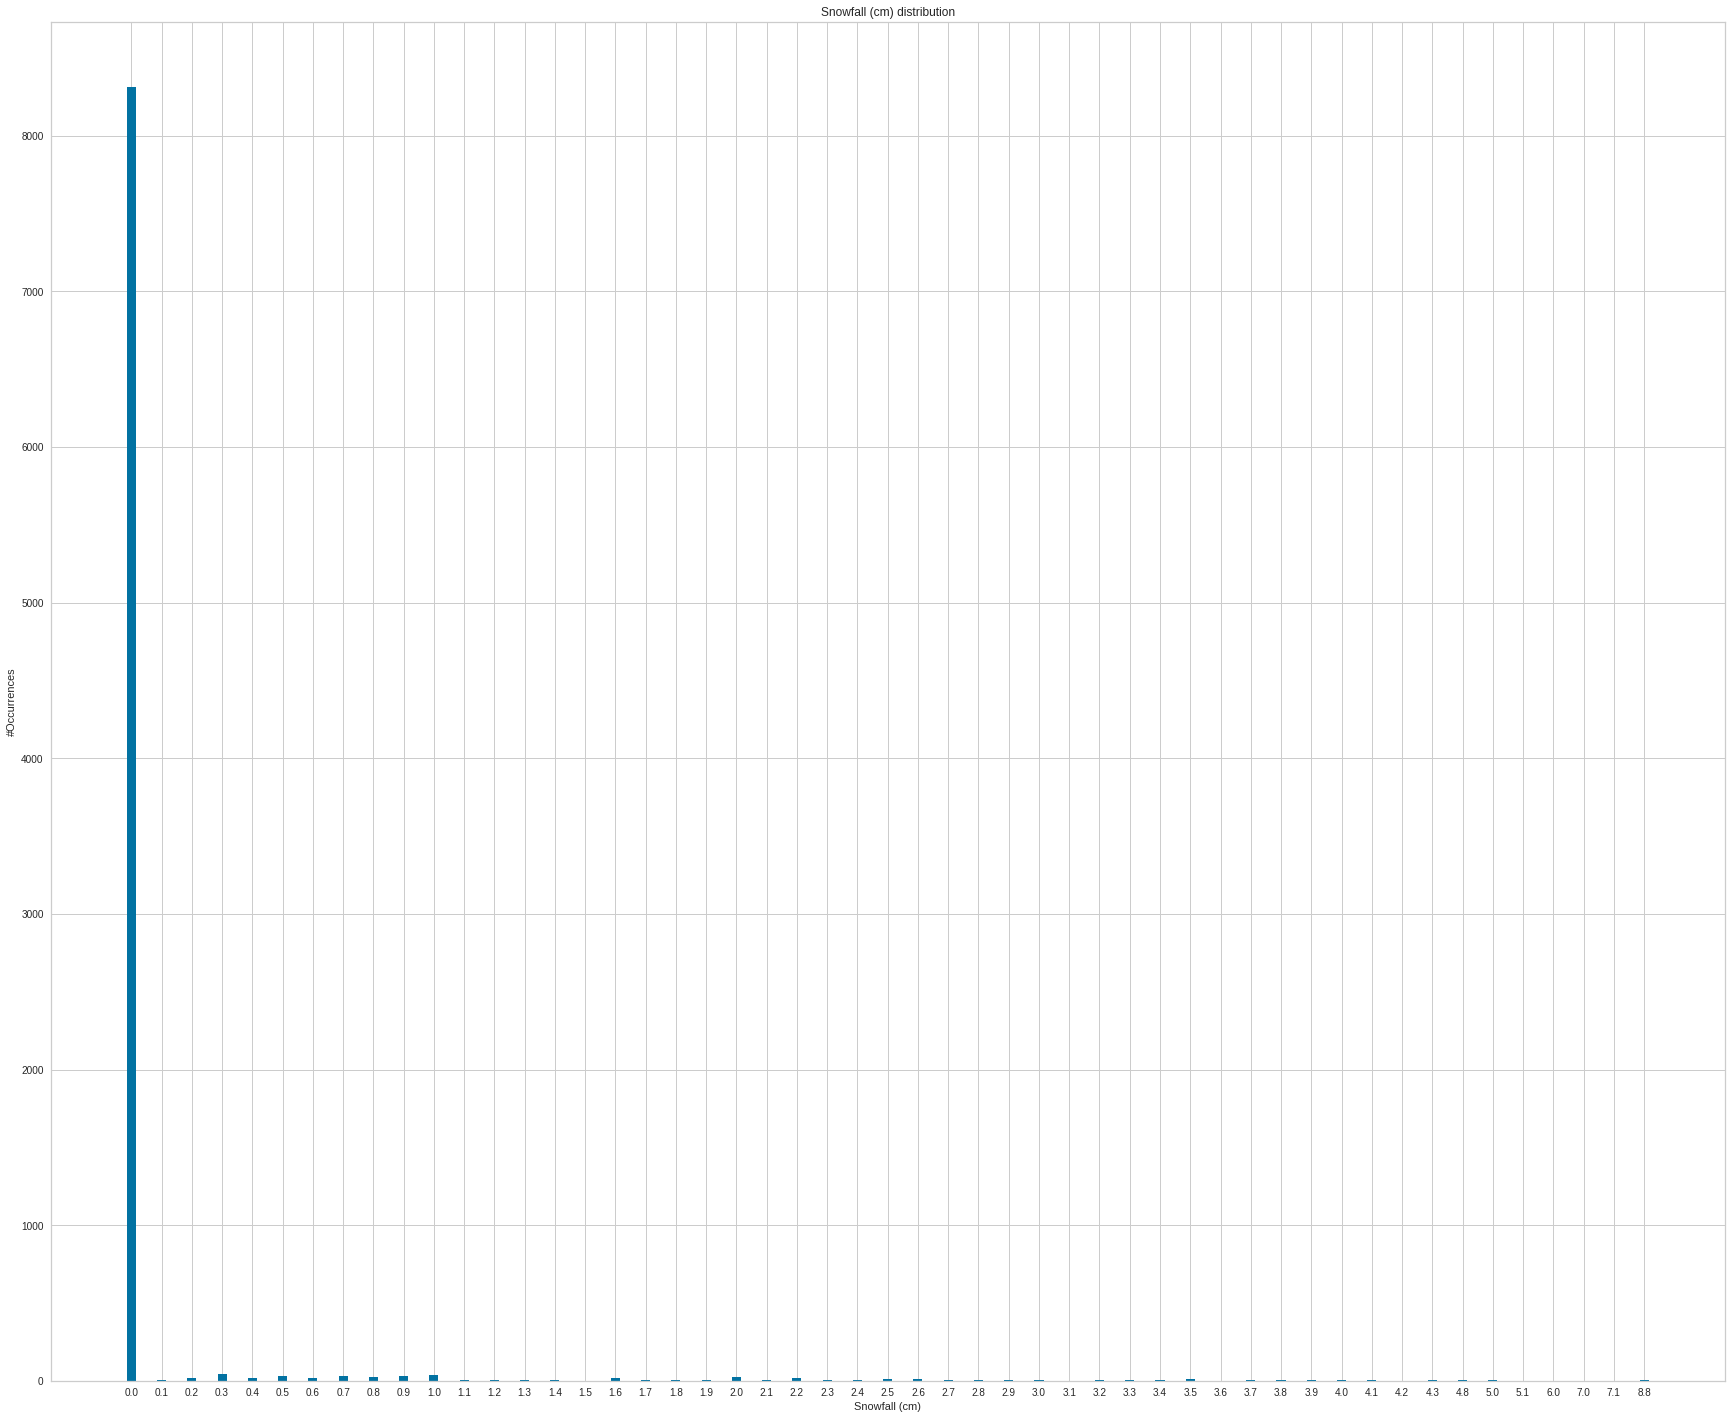

Snowfall (cm) is OK




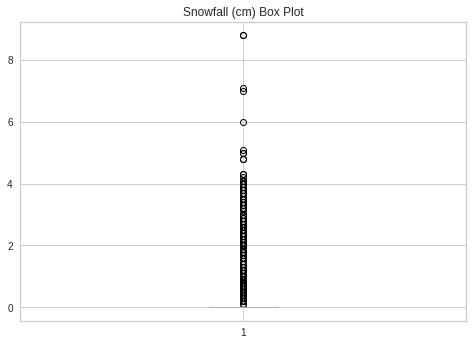

In [142]:
for a in autoanalyze:
  analyzeAttribute(a, df)

ANALYZING Seasons:


Sorted values:
['Autumn' 'Spring' 'Summer' 'Winter']
Unique values frequency:
{'Autumn': 2184, 'Spring': 2208, 'Summer': 2208, 'Winter': 2160}


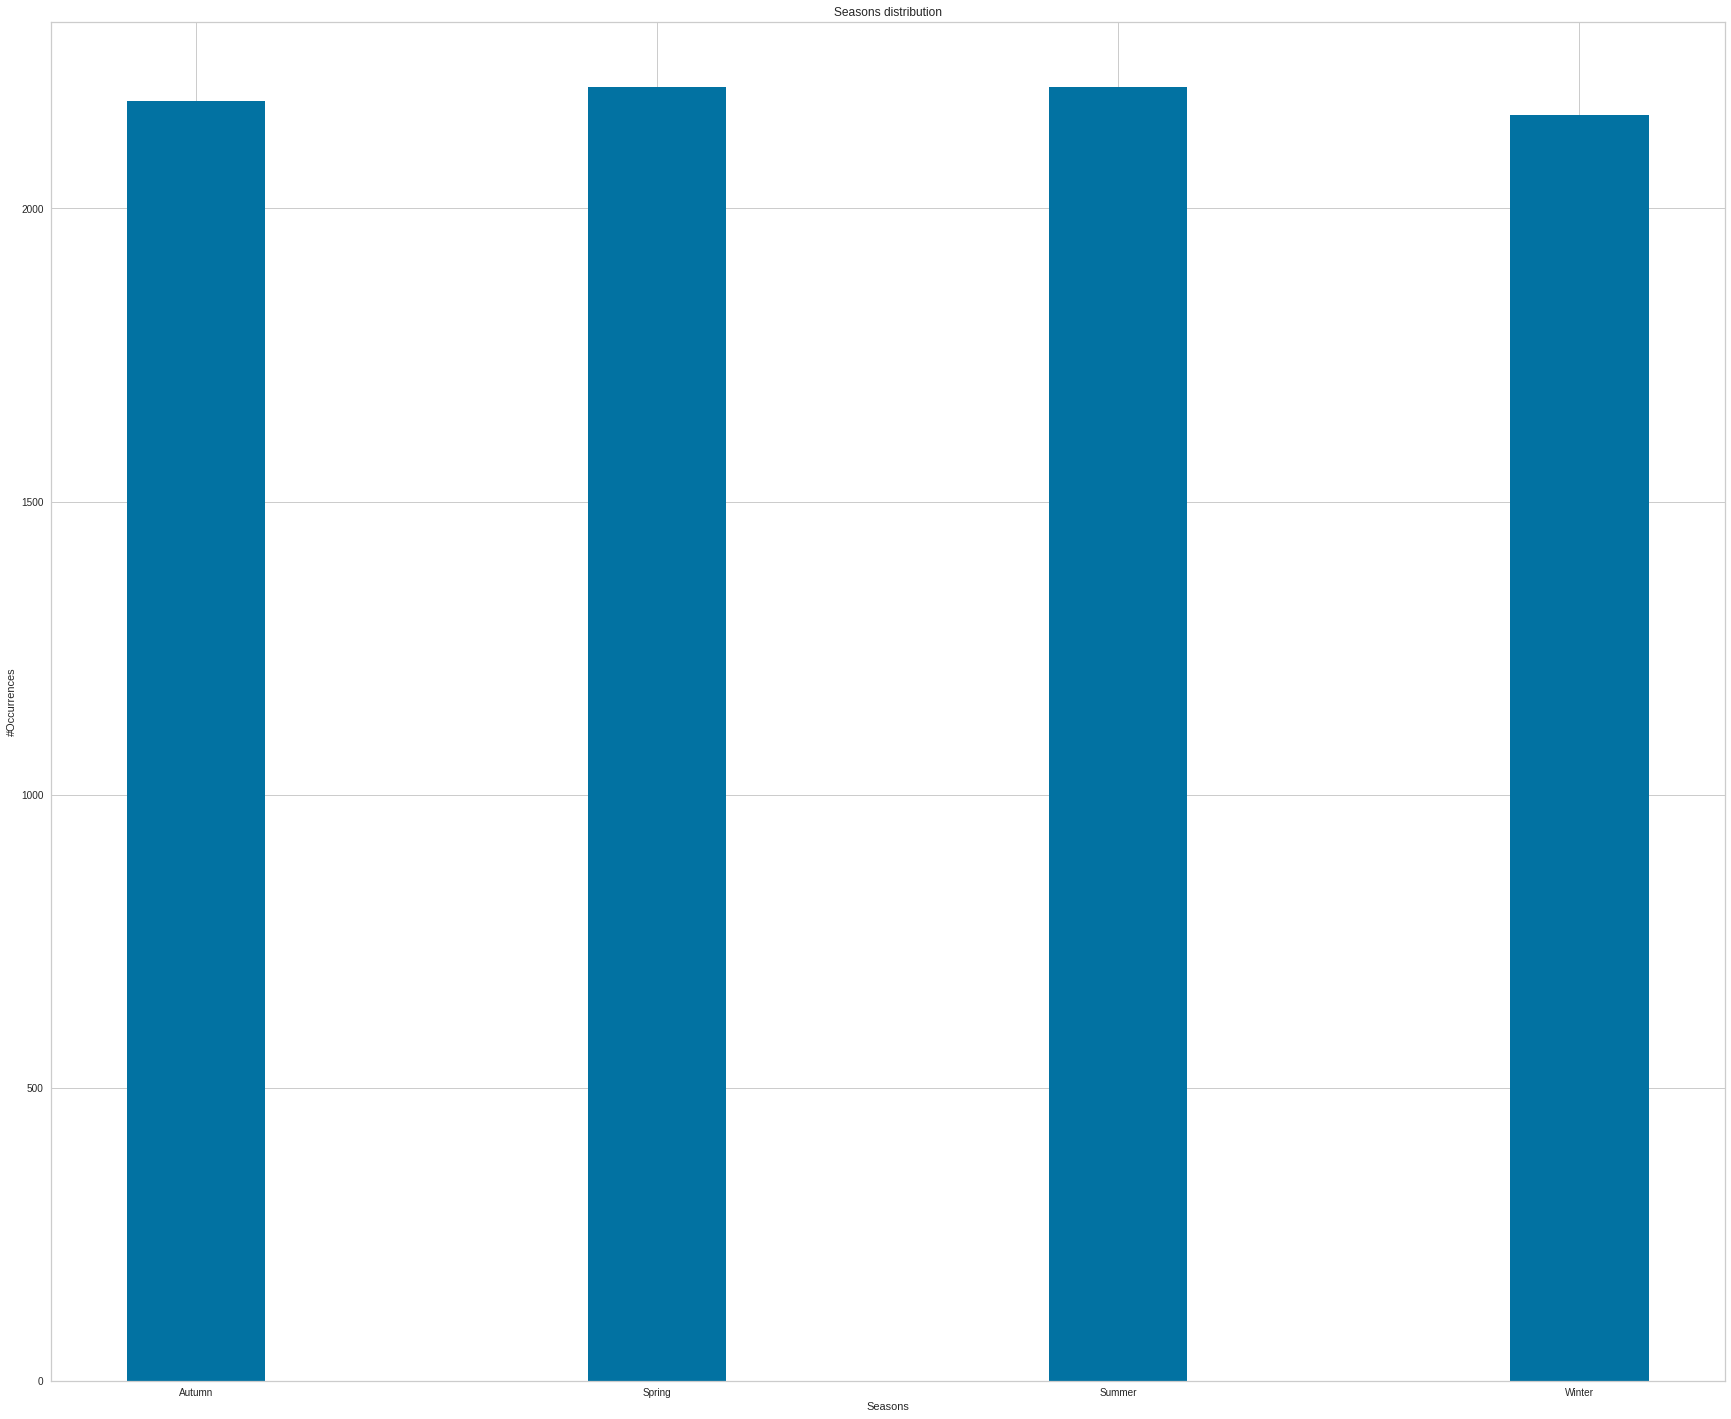

Seasons is OK


ANALYZING Holiday:


Sorted values:
['Holiday' 'No Holiday']
Unique values frequency:
{'Holiday': 432, 'No Holiday': 8328}


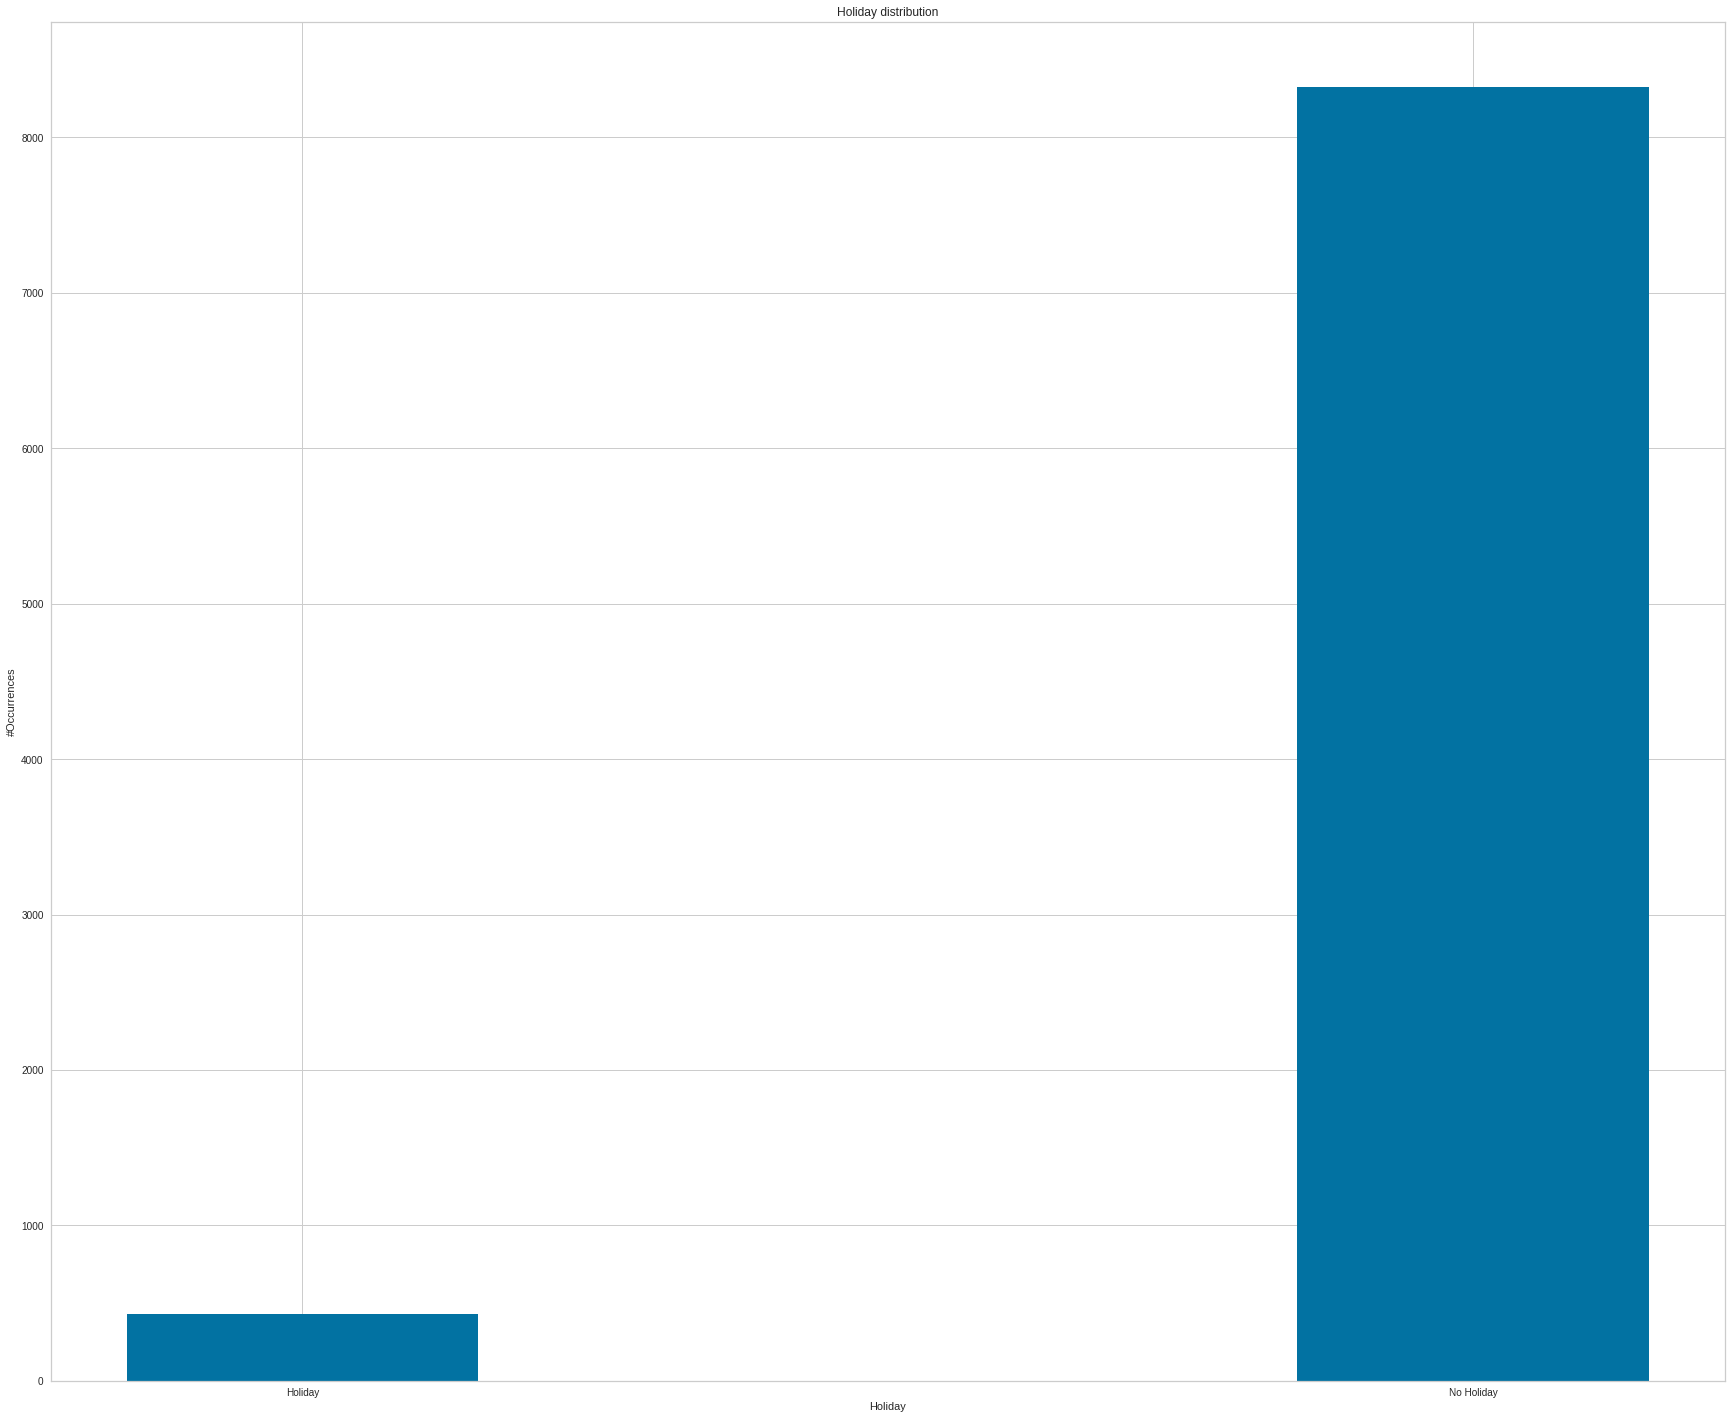

Holiday is OK


ANALYZING Functioning Day:


Sorted values:
['No' 'Yes']
Unique values frequency:
{'No': 295, 'Yes': 8465}


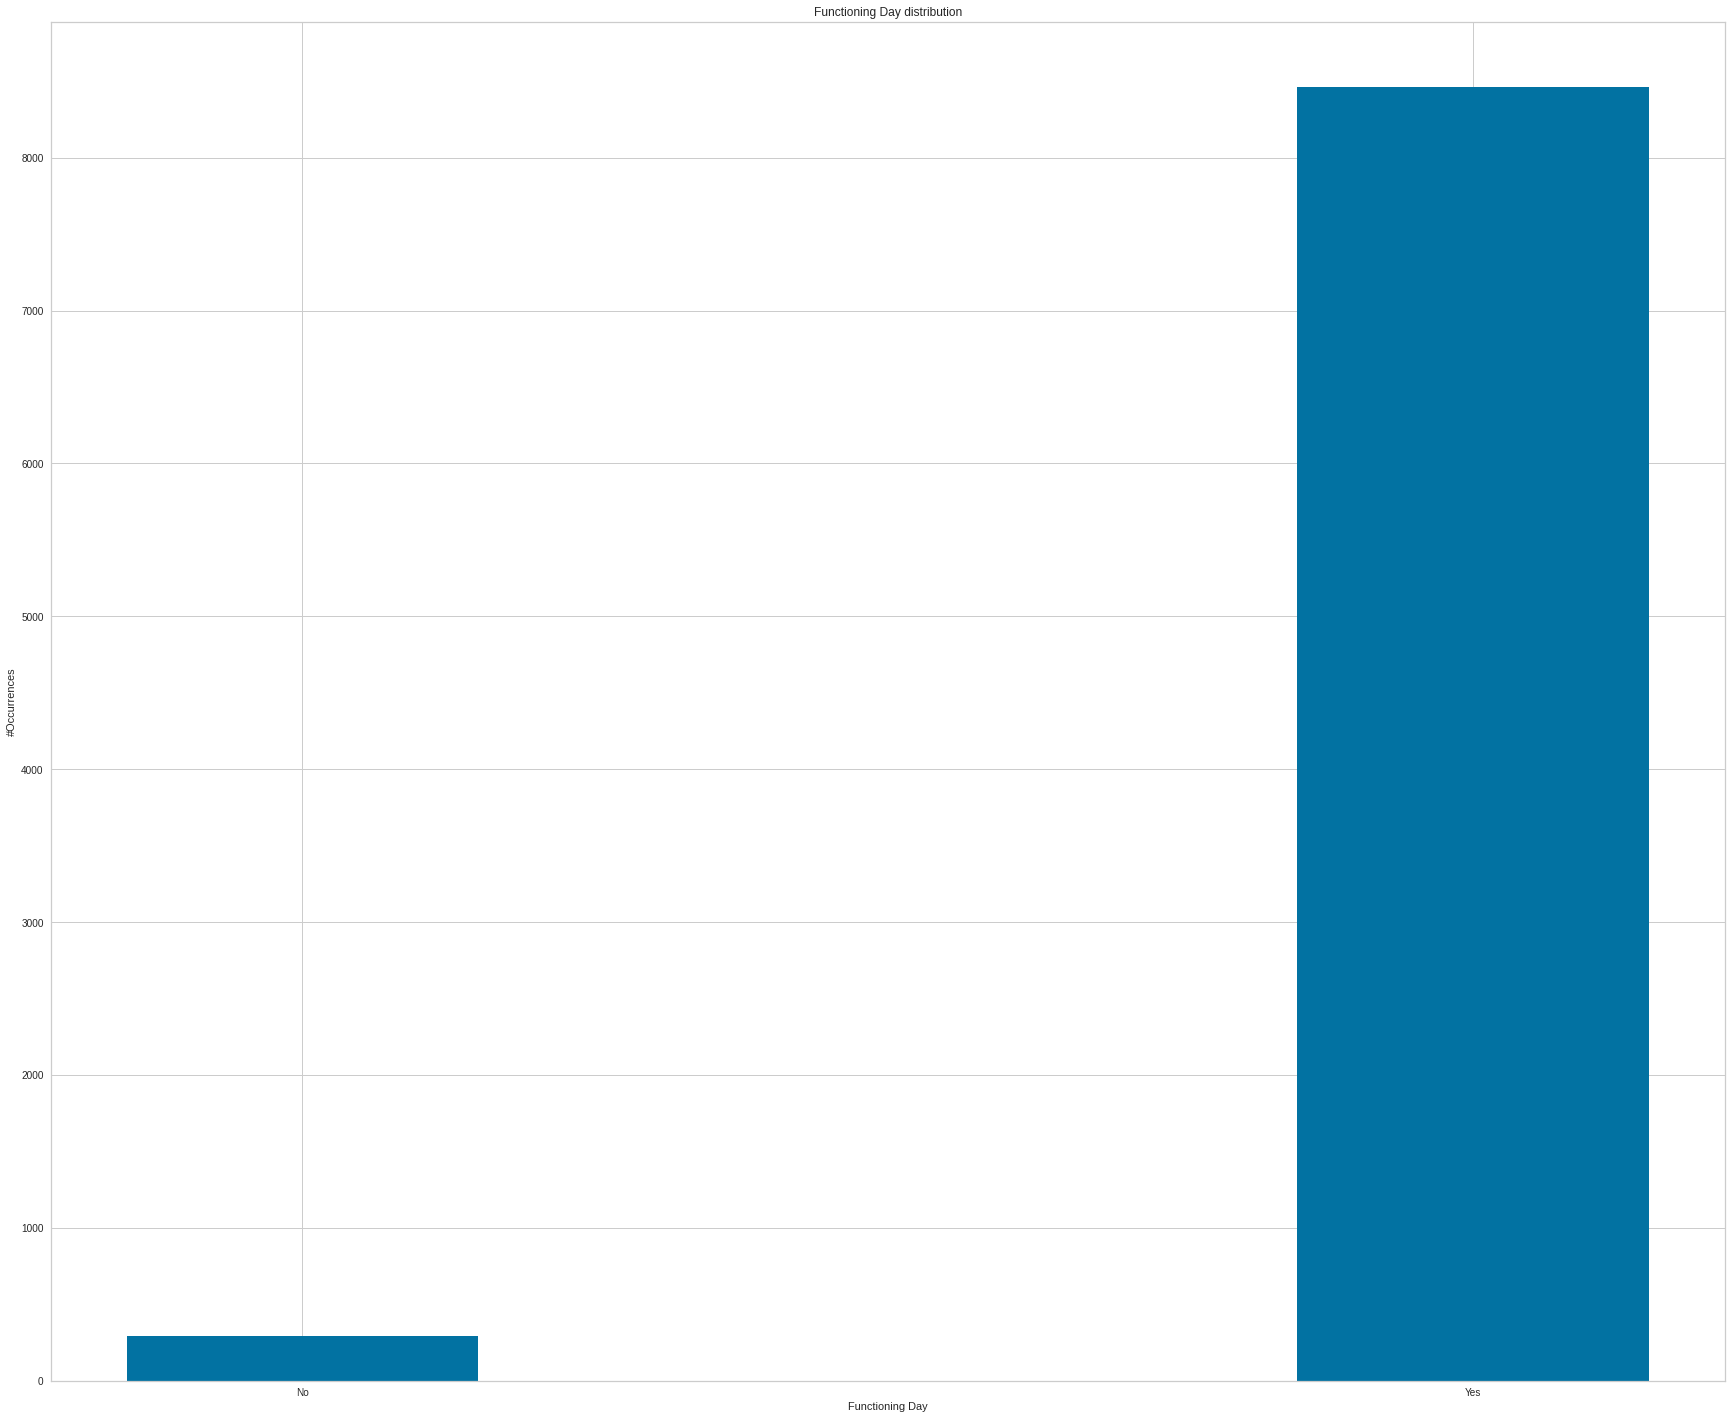

Functioning Day is OK




In [143]:
#Analyse the remaining fields
# Seasons 11/13
# Holiday 12/13
# Functioning Day 13/13

remainingAttributes = list(["Seasons", "Holiday", "Functioning Day"])
for a in remainingAttributes:
  attribute = a                           # The attribute to be analyzed
  data = df                                     # The data to analyze

  print(f"ANALYZING {attribute}:\n\n")

  sortedVals = data.sort_values(by=[attribute]) # Sorting the df for the attribute of interest
  uniqueVals = sortedVals[attribute].unique()   # Extracting the unique values of the attribute to check them visually
  print("Sorted values:")
  print(uniqueVals)

  vals = sortedVals[attribute]                  # Counting occurrences of all the values of the attribute
  valsCount = dict()
  for v in vals:
    if v in valsCount:
      valsCount[v] += 1
    else:
      valsCount[v] = 1

  print("Unique values frequency:")
  print(valsCount)

  fig = plt.figure(figsize=(30, 25))            # Plotting the occurrences as a barchar countplot to have a rough idea of the distribution
  y_pos = np.arange(len(valsCount))

  plt.bar(y_pos, valsCount.values(), align='center', width=0.3)
  plt.xticks(y_pos, valsCount.keys())

  plt.ylabel('#Occurrences')
  plt.xlabel(attribute)
  plt.title(f'{attribute} distribution')

  plt.show()


  # NO BOXPLOT

  tot = 0                                      # Check the toal sums up to the df total instances
  for v in valsCount.values():
    tot += v
  if tot == data.shape[0]:
    print(f"{attribute} is OK\n\n")

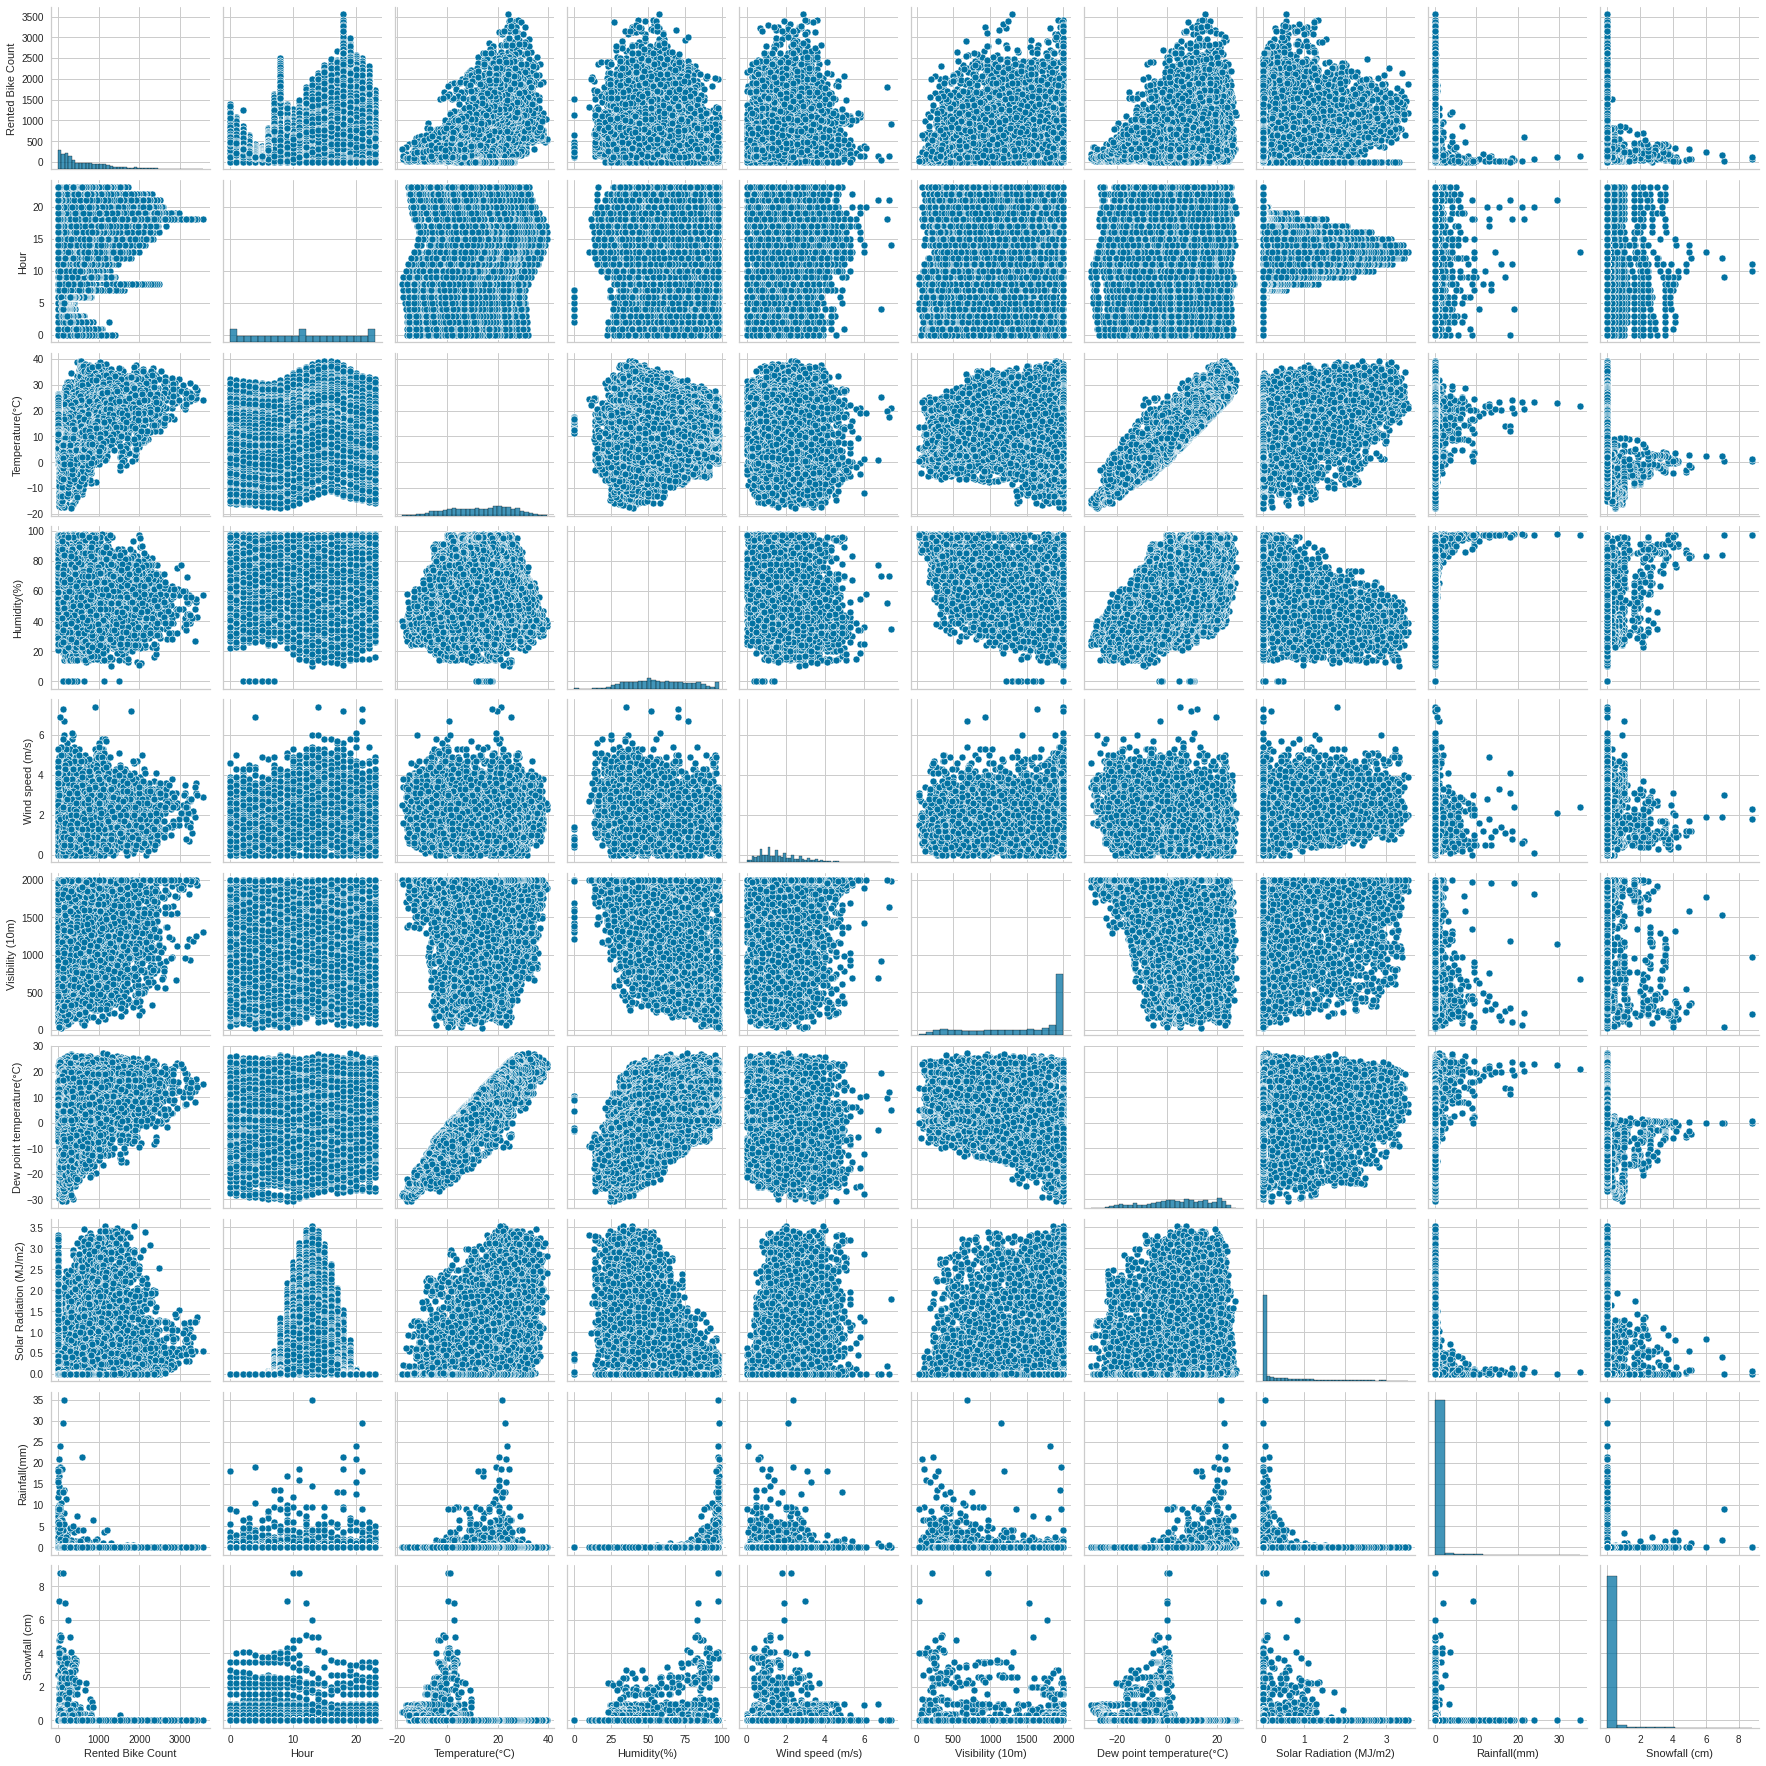

In [144]:
# Correlation analysis BEGIN
sns.pairplot(df)

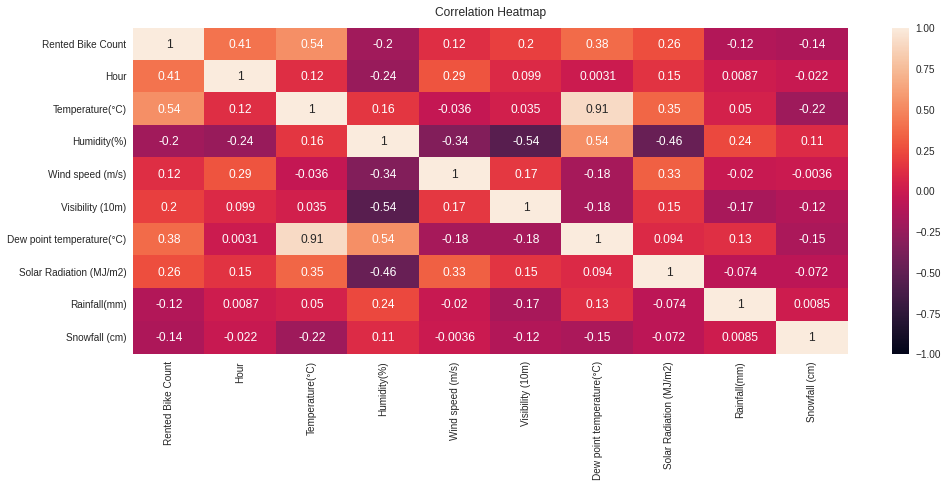

In [145]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Preprocessing

In [146]:
# Preprocessing


# categorical to binary HOLIDAY and FUNCTIONING DAY
holid = df['Holiday']
new_holid = list()

fd = df['Functioning Day']
new_fd = list()

for h in holid:
  if h == 'Holiday':
    new_holid.append(1)
  else:
    new_holid.append(0)
for f in fd:
  if f == 'Yes':
    new_fd.append(1)
  else:
    new_fd.append(0)

df['Binary Holiday'] = new_holid
df['Binary Functioning Day'] = new_fd

In [147]:
# Categorical to binary: SEASONS

seasons = df['Seasons']

wi = list()
sp = list()
su = list()
au = list()  # IMPLICIT: N values to N-1 variables


for s in seasons:
  if s == 'Winter':
    wi.append(1)
    sp.append(0)
    su.append(0)
    au.append(0)
  elif s == 'Spring':
    wi.append(0)
    sp.append(1)
    su.append(0)
    au.append(0)
  elif s == 'Summer':
    wi.append(0)
    sp.append(0)
    su.append(1)
    au.append(0)
  else:
    wi.append(0)
    sp.append(0)
    su.append(0)
    au.append(1)

df['Winter'] = wi
df['Spring'] = sp
df['Summer'] = su
df['Autumn'] = au

In [148]:
dates = df['Date']
weekdays = list() # 0 to 6
months = list()   # 1 to 12
format = '%d/%m/%Y'

for d in dates:
  date = datetime.datetime.strptime(d, format)
  weekdays.append(date.weekday())
  months.append(date.month)
  
lun = list()
mar = list()
mer = list()
gio = list()
ven = list()
sab = list()
dom = list()

gen = list()
feb = list()
mrr = list()
apr = list()
mag = list()
giu = list()
lug = list()
ago = list()
stt = list()
ott = list()
nov = list()
dec = list()

for d, m in zip(weekdays, months):
  if d == 0:
    lun.append(1)
    mar.append(0)
    mer.append(0)
    gio.append(0)
    ven.append(0)
    sab.append(0)
    dom.append(0)
  elif d == 1:
    lun.append(0)
    mar.append(1)
    mer.append(0)
    gio.append(0)
    ven.append(0)
    sab.append(0)
    dom.append(0)
  elif d == 2:
    lun.append(0)
    mar.append(0)
    mer.append(1)
    gio.append(0)
    ven.append(0)
    sab.append(0)
    dom.append(0)
  elif d == 3:
    lun.append(0)
    mar.append(0)
    mer.append(0)
    gio.append(1)
    ven.append(0)
    sab.append(0)
    dom.append(0)
  elif d == 4:
    lun.append(0)
    mar.append(0)
    mer.append(0)
    gio.append(0)
    ven.append(1)
    sab.append(0)
    dom.append(0)
  elif d == 5:
    lun.append(0)
    mar.append(0)
    mer.append(0)
    gio.append(0)
    ven.append(0)
    sab.append(1)
    dom.append(0)
  else:
    lun.append(0)
    mar.append(0)
    mer.append(0)
    gio.append(0)
    ven.append(0)
    sab.append(0)
    dom.append(1)

  if m == 1:
    gen.append(1)
    feb.append(0)
    mrr.append(0)
    apr.append(0)
    mag.append(0)
    giu.append(0)
    lug.append(0)
    ago.append(0)
    stt.append(0)
    ott.append(0)
    nov.append(0)
    dec.append(0)
  elif m == 2:
    gen.append(0)
    feb.append(1)
    mrr.append(0)
    apr.append(0)
    mag.append(0)
    giu.append(0)
    lug.append(0)
    ago.append(0)
    stt.append(0)
    ott.append(0)
    nov.append(0)
    dec.append(0)
  elif m == 3:
    gen.append(0)
    feb.append(0)
    mrr.append(1)
    apr.append(0)
    mag.append(0)
    giu.append(0)
    lug.append(0)
    ago.append(0)
    stt.append(0)
    ott.append(0)
    nov.append(0)
    dec.append(0)
  elif m == 4:
    gen.append(0)
    feb.append(0)
    mrr.append(0)
    apr.append(1)
    mag.append(0)
    giu.append(0)
    lug.append(0)
    ago.append(0)
    stt.append(0)
    ott.append(0)
    nov.append(0)
    dec.append(0)
  elif m == 5:
    gen.append(0)
    feb.append(0)
    mrr.append(0)
    apr.append(0)
    mag.append(1)
    giu.append(0)
    lug.append(0)
    ago.append(0)
    stt.append(0)
    ott.append(0)
    nov.append(0)
    dec.append(0)
  elif m == 6:
    gen.append(0)
    feb.append(0)
    mrr.append(0)
    apr.append(0)
    mag.append(0)
    giu.append(1)
    lug.append(0)
    ago.append(0)
    stt.append(0)
    ott.append(0)
    nov.append(0)
    dec.append(0)
  elif m == 7:
    gen.append(0)
    feb.append(0)
    mrr.append(0)
    apr.append(0)
    mag.append(0)
    giu.append(0)
    lug.append(1)
    ago.append(0)
    stt.append(0)
    ott.append(0)
    nov.append(0)
    dec.append(0)
  elif m == 8:
    gen.append(0)
    feb.append(0)
    mrr.append(0)
    apr.append(0)
    mag.append(0)
    giu.append(0)
    lug.append(0)
    ago.append(1)
    stt.append(0)
    ott.append(0)
    nov.append(0)
    dec.append(0)
  elif m == 9:
    gen.append(0)
    feb.append(0)
    mrr.append(0)
    apr.append(0)
    mag.append(0)
    giu.append(0)
    lug.append(0)
    ago.append(0)
    stt.append(1)
    ott.append(0)
    nov.append(0)
    dec.append(0)
  elif m == 10:
    gen.append(0)
    feb.append(0)
    mrr.append(0)
    apr.append(0)
    mag.append(0)
    giu.append(0)
    lug.append(0)
    ago.append(0)
    stt.append(0)
    ott.append(1)
    nov.append(0)
    dec.append(0)
  elif m == 11:
    gen.append(0)
    feb.append(0)
    mrr.append(0)
    apr.append(0)
    mag.append(0)
    giu.append(0)
    lug.append(0)
    ago.append(0)
    stt.append(0)
    ott.append(0)
    nov.append(1)
    dec.append(0)
  else:
    gen.append(0)
    feb.append(0)
    mrr.append(0)
    apr.append(0)
    mag.append(0)
    giu.append(0)
    lug.append(0)
    ago.append(0)
    stt.append(0)
    ott.append(0)
    nov.append(0)
    dec.append(1)

df['Monday'] = lun
df['Tuesday'] = mar
df['Wednesday'] = mer
df['Thursday'] = gio  
df['Friday'] = ven
df['Saturday'] = sab
df['Sunday'] = dom

df['January'] = gen
df['February'] = feb
df['March'] = mrr
df['April'] = apr
df['May'] = mag
df['June'] = giu
df['July'] = lug
df['August'] = ago
df['September'] = stt
df['October'] = ott
df['November'] = nov
df['December'] = dec

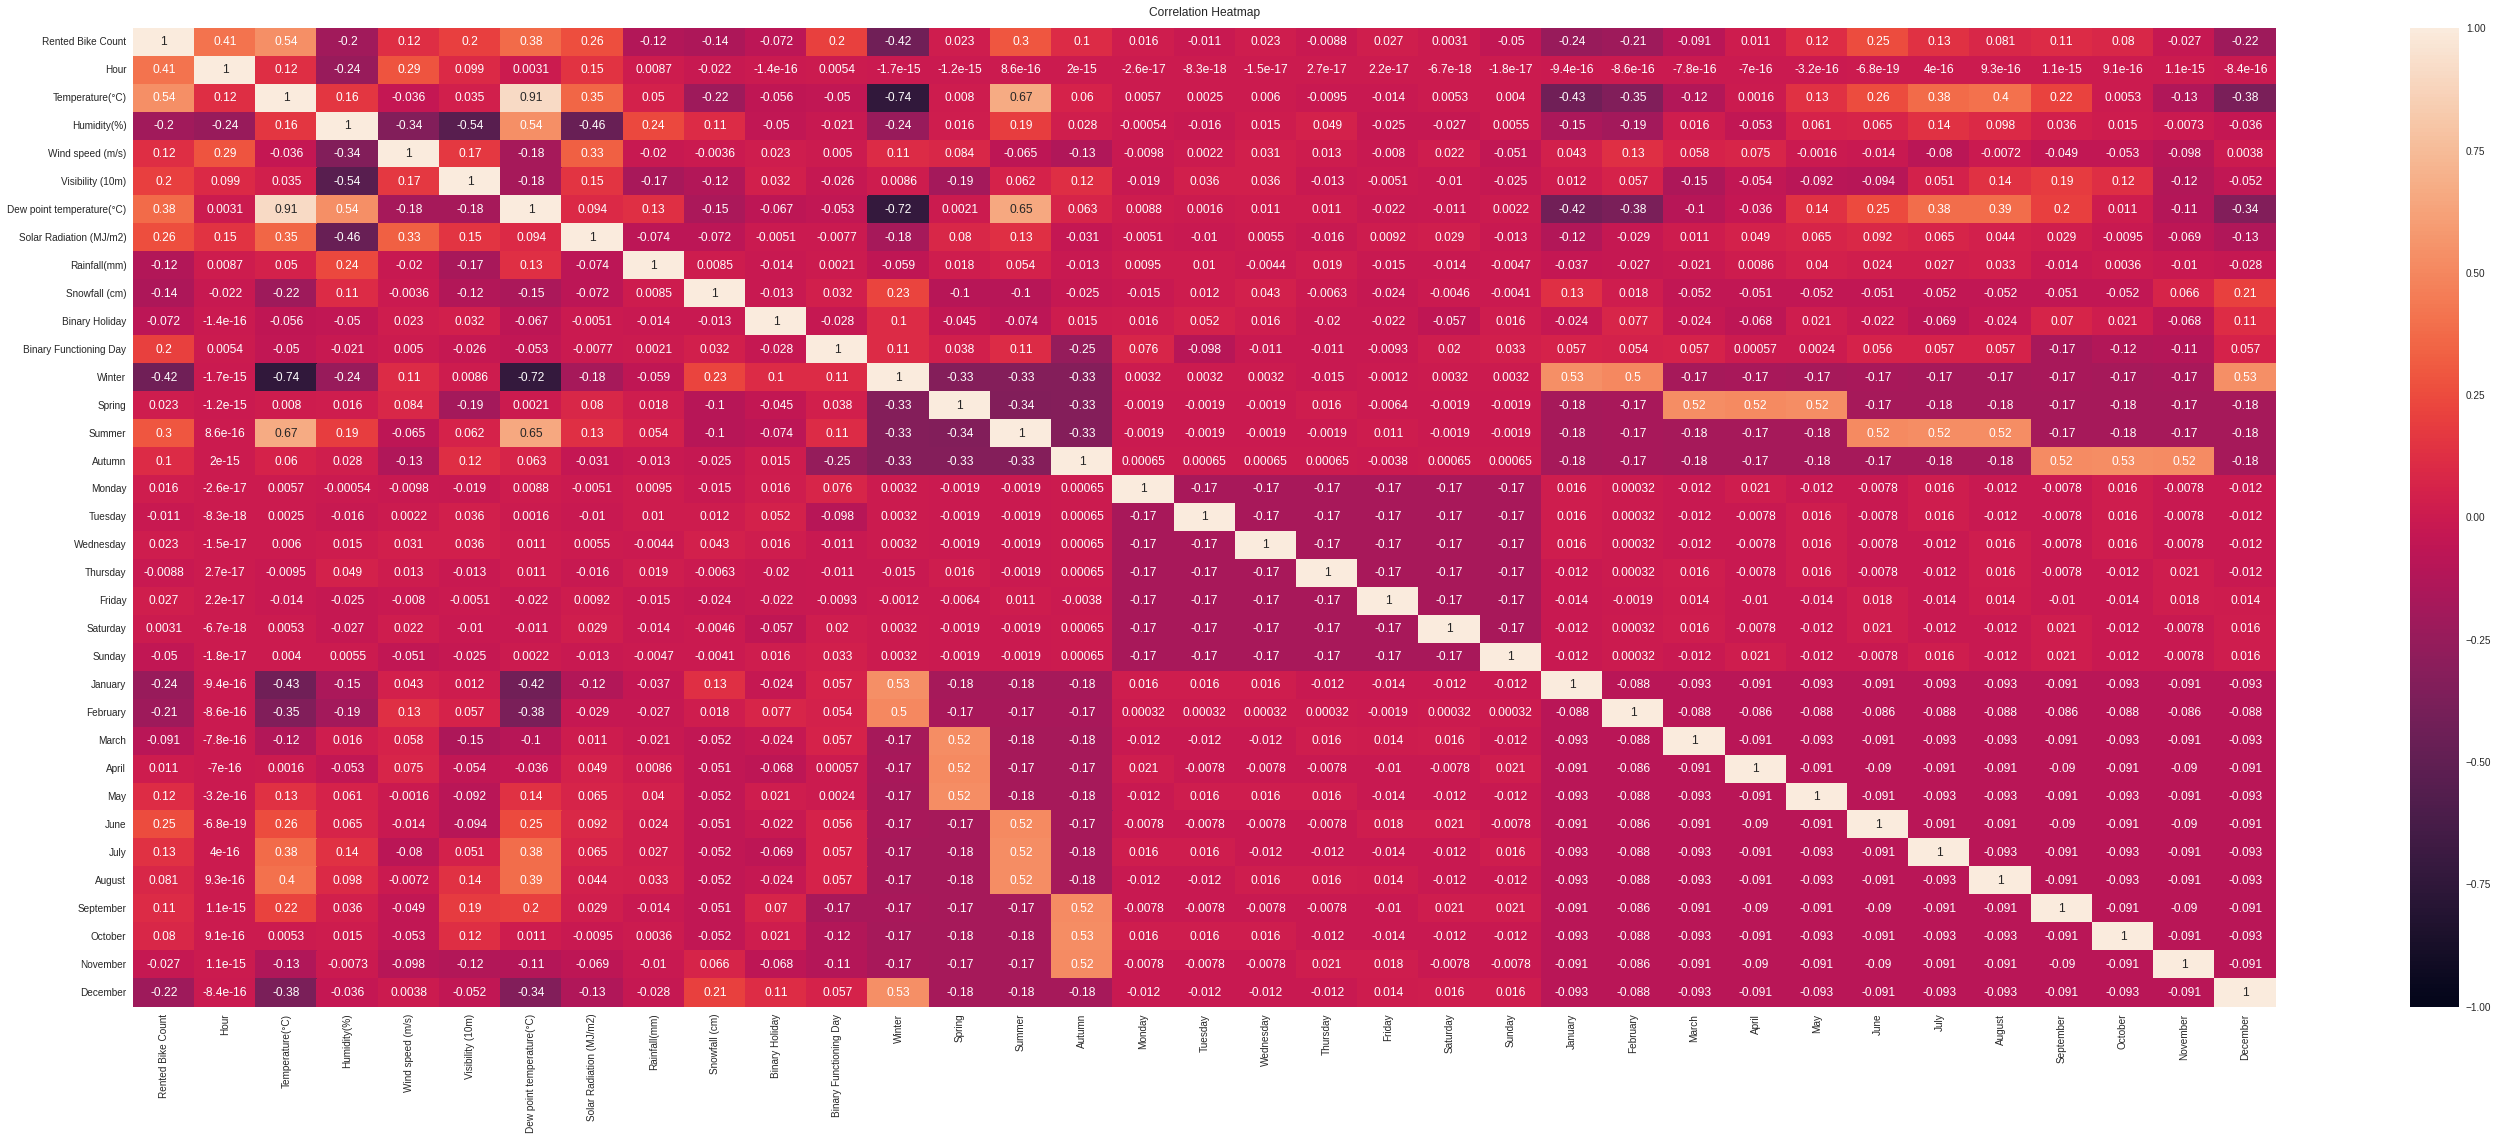

In [149]:
# Increase the size of the heatmap.
plt.figure(figsize=(48, 18))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [150]:
# Dropping the old categorical attributes in favour of the new binary ones
transformed_df = df[["Rented Bike Count", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Hour", "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", "Winter", "Spring", "Summer", "Autumn", "Binary Holiday", "Binary Functioning Day"]]

# Dropping the attributes according to correlation:
#   - Dew point temperature
#   - Summer, Autumn, Spring, Winter
#   - Sunday, Winter (the Nth catedgorical dummy)
new_df = transformed_df[["Rented Bike Count", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Binary Holiday', 'Binary Functioning Day']]
new_df.head(25)

new_df = transformed_df[["Rented Bike Count", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Binary Holiday', 'Binary Functioning Day']]


In [151]:
# Outliers removal IQR - SOLAR RADIATION

q_low = new_df['Solar Radiation (MJ/m2)'].quantile(0.25)
q_hi  = new_df['Solar Radiation (MJ/m2)'].quantile(0.75)

print(q_low)
print(q_hi)

# Cannot apply IQR

new_q_high = new_df['Solar Radiation (MJ/m2)'].quantile(0.99)
print(new_q_high) #ok

df_filtered = new_df[(new_df['Solar Radiation (MJ/m2)'] < new_q_high)]

print(df_filtered.shape[0]) # 8760 - 86688 around 100 elements removed

0.0
0.93
3.17
8668


In [152]:
# Outliers removal IQR - WIND SPEED
q_low = df_filtered['Wind speed (m/s)'].quantile(0.25)
q_hi  = df_filtered['Wind speed (m/s)'].quantile(0.75)

print(q_low)
print(q_hi)

# Cannot apply IQR

new_q_high = df_filtered['Wind speed (m/s)'].quantile(0.99)
print(new_q_high) #ok

df_outliers_removed = df_filtered[(df_filtered['Wind speed (m/s)'] < new_q_high)]

print(df_outliers_removed.shape[0]) # 8668 - 8575 around 100 removed

0.9
2.3
4.7
8575


In [153]:
# Standardization
attribs = list()
for c in df_outliers_removed.columns:
  attribs.append(c)
  df_outliers_removed[c] = (df_outliers_removed[c] - df_outliers_removed[c].mean()) / df_outliers_removed[c].std()

df_outliers_removed.head(5)
df_outliers_removed.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(8575, 28)

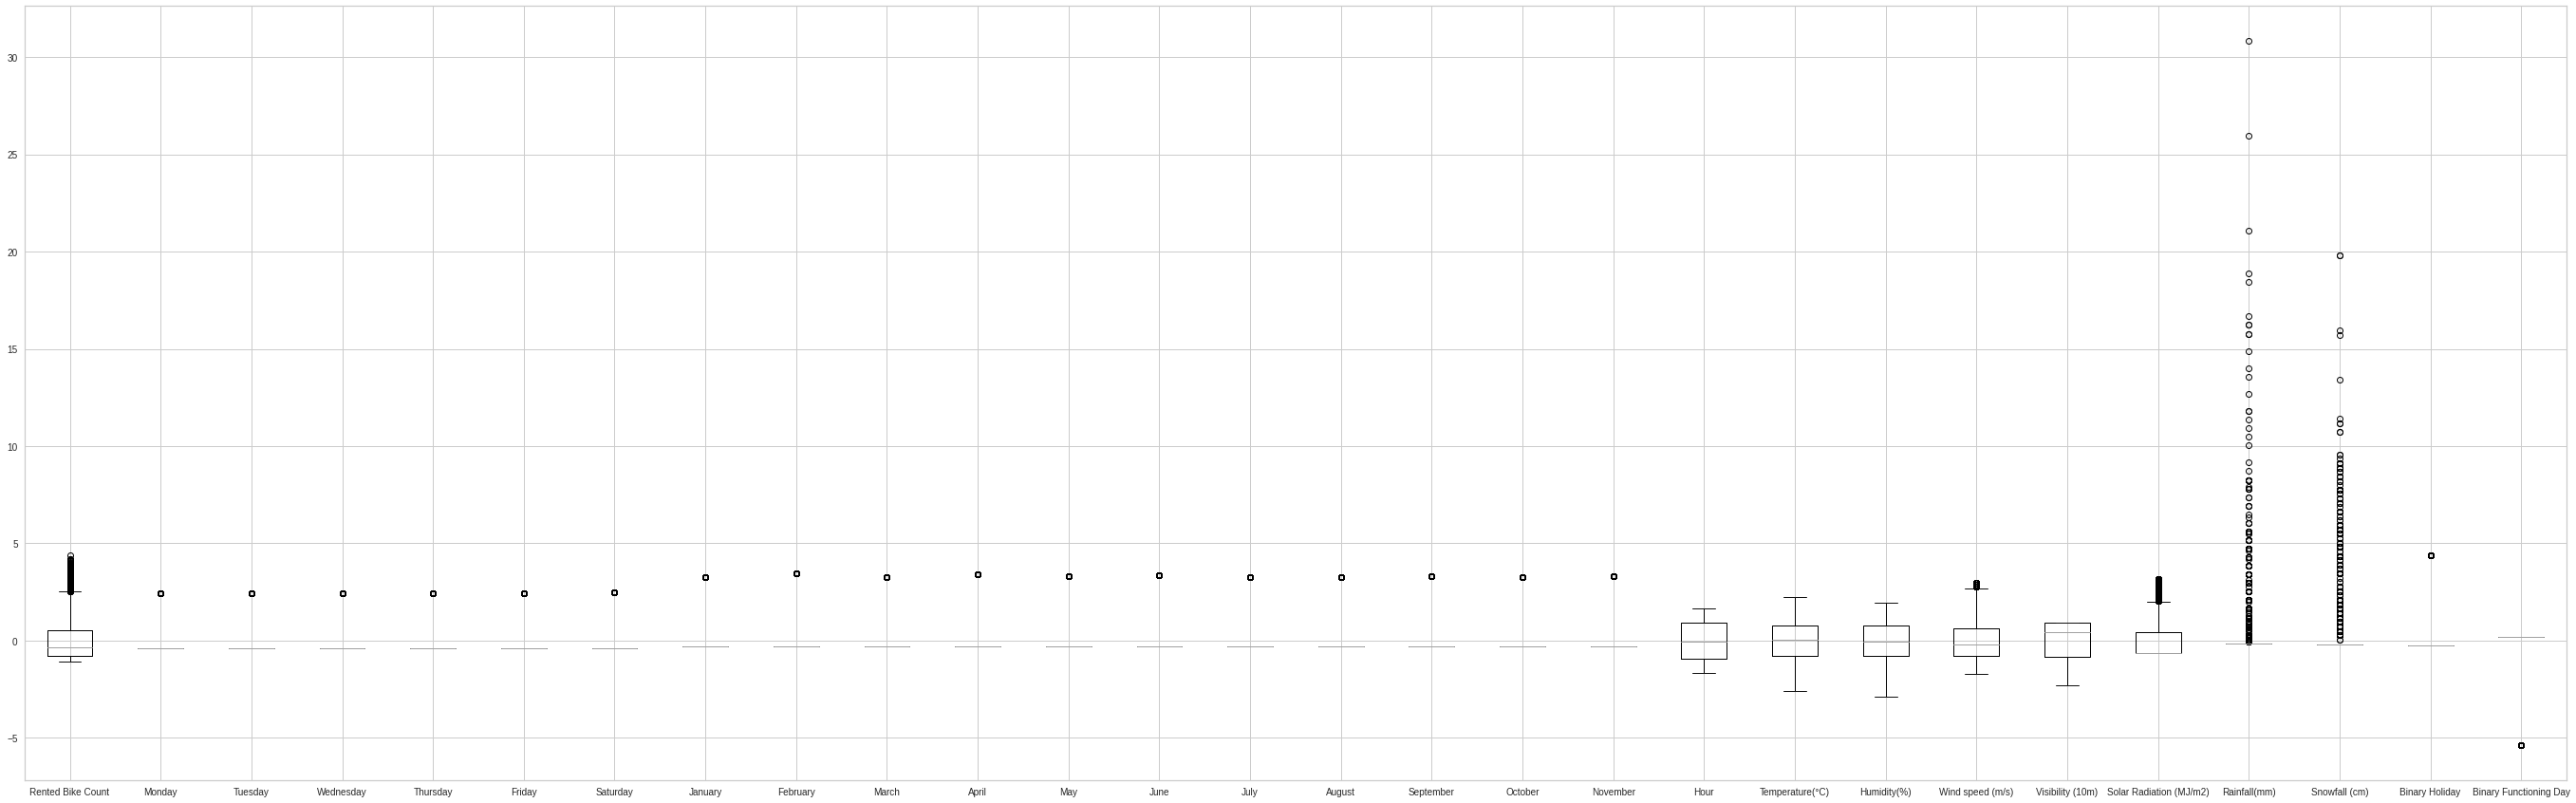

In [154]:
boxplot = df_outliers_removed.boxplot(column=attribs, figsize=(48,15))

# Model implementation


*   Linear regression
*   Polynommial regression
* SVR



In [155]:
# Train test split with 80% to 20% split

y = df_outliers_removed['Rented Bike Count']
#x = df_outliers_removed[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Binary Holiday', 'Binary Functioning Day']]
x = df_outliers_removed[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Binary Holiday', 'Binary Functioning Day']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [156]:
# Linear regression

lm = LinearRegression().fit(x_train, y_train)

y_pred = lm.predict(x_test)

r2 = r2_score(y_test, y_pred)

print(x_test.shape)
p = x_test.shape[1] # number of independent variables
n = x_test.shape[0] # cardinality of the

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print(r2)
print(adj_r2)


(1715, 27)
0.6006624292954603
0.5942711344471956


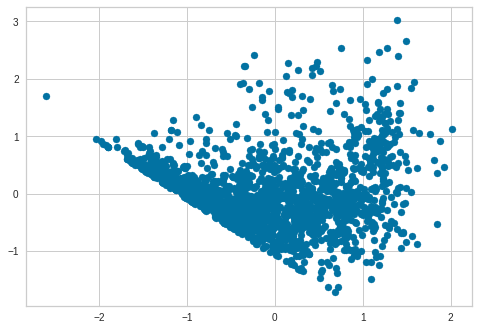

In [157]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.show()

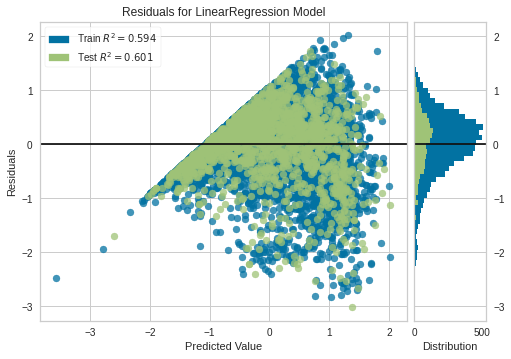

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


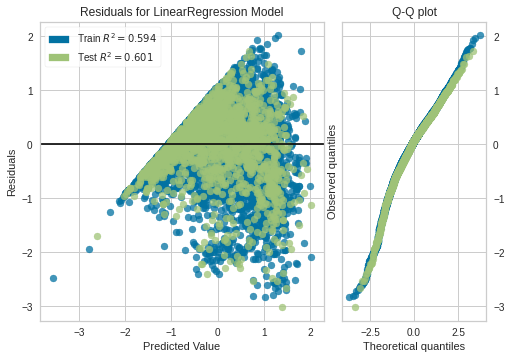

In [105]:
# A better version of residuals plot
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

visualizer = ResidualsPlot(model, hist=False, qqplot=True)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

Degree: 2
(1715, 405)
0.7469987675365763
0.6687210752923544


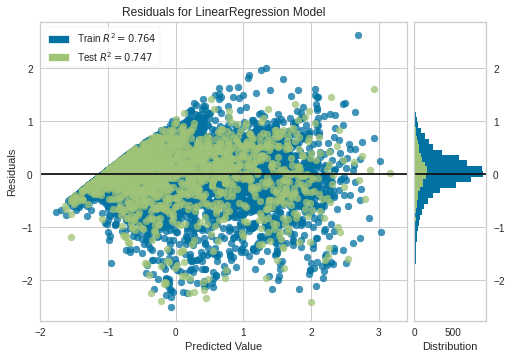

Degree: 3
(1715, 4059)
-595238174003199.8
435069607778886.3


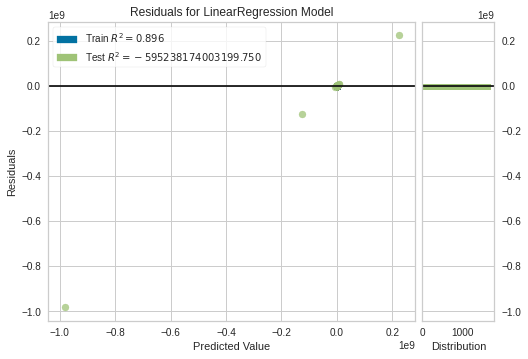

In [158]:
# Polynomial regression

for degree in list([2,3]):


  print(f"Degree: {degree}")

  poly = PolynomialFeatures(degree, include_bias=False)
  new_x = poly.fit_transform(x)

  x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=42)

  lm = LinearRegression().fit(x_train, y_train)

  y_pred = lm.predict(x_test)

  r2 = r2_score(y_test, y_pred)

  print(x_test.shape)
  p = x_test.shape[1] # number of independent variables
  n = x_test.shape[0] # cardinality of the

  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

  print(r2)
  print(adj_r2)

  model = LinearRegression()
  visualizer = ResidualsPlot(model)

  visualizer.fit(x_train, y_train)
  visualizer.score(x_test, y_test)
  visualizer.show()

In [159]:
# SVR

y = df_outliers_removed['Rented Bike Count']
#x = df_outliers_removed[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Binary Holiday', 'Binary Functioning Day']]
x = df_outliers_removed[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Binary Holiday', 'Binary Functioning Day']]


# train test (20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train val (20% val)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Simplified grid search

kernel = list(['linear', 'poly', 'rbf'])
Cs = list([1, 3, 5, 10, 15])
Eps = list([0.1, 0.2, 0.3, 0.4])

results = list()

for k in kernel:
  for c in Cs:
    for e in Eps:

      print(f"Now testing: kernel={k} C={c} epsilon={e}")

      model = SVR(C=c, epsilon=e, kernel=k)


      model.fit(x_train, y_train)
      y_pred = model.predict(x_val)


      r2 = r2_score(y_val, y_pred)

      print(x_val.shape)
      p = x_val.shape[1] # number of independent variables
      n = x_val.shape[0] # cardinality of the

      adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

      print(r2)
      print(adj_r2)

      res = dict()
      res["kernel"] = k
      res["C"] = c
      res["epsilon"] = e
      res["R2"] = r2
      res["Adj R2"] = adj_r2
      results.append(res)

Now testing: kernel=linear C=1 epsilon=0.1
(1372, 27)
0.5638951914517202
0.5551341573514199
Now testing: kernel=linear C=1 epsilon=0.2
(1372, 27)
0.5730430610368445
0.5644658011023169
Now testing: kernel=linear C=1 epsilon=0.3
(1372, 27)
0.5815036016196017
0.5730963079021383
Now testing: kernel=linear C=1 epsilon=0.4
(1372, 27)
0.5886443450785677
0.5803805037966638
Now testing: kernel=linear C=3 epsilon=0.1
(1372, 27)
0.5641049390597547
0.5553481186390801
Now testing: kernel=linear C=3 epsilon=0.2
(1372, 27)
0.573089219405327
0.5645128867594519
Now testing: kernel=linear C=3 epsilon=0.3
(1372, 27)
0.5815471802976346
0.5731407620446853
Now testing: kernel=linear C=3 epsilon=0.4
(1372, 27)
0.5886911441454403
0.580428243023362
Now testing: kernel=linear C=5 epsilon=0.1
(1372, 27)
0.5640553804974815
0.5552975644806899
Now testing: kernel=linear C=5 epsilon=0.2
(1372, 27)
0.5730625592847676
0.5644856910561133
Now testing: kernel=linear C=5 epsilon=0.3
(1372, 27)
0.5815653791102416
0.5731593

In [160]:
for r in results:
  print(r)

{'kernel': 'linear', 'C': 1, 'epsilon': 0.1, 'R2': 0.5638951914517202, 'Adj R2': 0.5551341573514199}
{'kernel': 'linear', 'C': 1, 'epsilon': 0.2, 'R2': 0.5730430610368445, 'Adj R2': 0.5644658011023169}
{'kernel': 'linear', 'C': 1, 'epsilon': 0.3, 'R2': 0.5815036016196017, 'Adj R2': 0.5730963079021383}
{'kernel': 'linear', 'C': 1, 'epsilon': 0.4, 'R2': 0.5886443450785677, 'Adj R2': 0.5803805037966638}
{'kernel': 'linear', 'C': 3, 'epsilon': 0.1, 'R2': 0.5641049390597547, 'Adj R2': 0.5553481186390801}
{'kernel': 'linear', 'C': 3, 'epsilon': 0.2, 'R2': 0.573089219405327, 'Adj R2': 0.5645128867594519}
{'kernel': 'linear', 'C': 3, 'epsilon': 0.3, 'R2': 0.5815471802976346, 'Adj R2': 0.5731407620446853}
{'kernel': 'linear', 'C': 3, 'epsilon': 0.4, 'R2': 0.5886911441454403, 'Adj R2': 0.580428243023362}
{'kernel': 'linear', 'C': 5, 'epsilon': 0.1, 'R2': 0.5640553804974815, 'Adj R2': 0.5552975644806899}
{'kernel': 'linear', 'C': 5, 'epsilon': 0.2, 'R2': 0.5730625592847676, 'Adj R2': 0.5644856910

In [161]:
# Second round of grid search

kernel = list(['rbf'])
Cs = list([15, 30, 50, 100])
Eps = list([0.1, 0.2, 0.3, 0.4])

results = list()

for k in kernel:
  for c in Cs:
    for e in Eps:

      print(f"Now testing: kernel={k} C={c} epsilon={e}")

      model = SVR(C=c, epsilon=e, kernel=k)


      model.fit(x_train, y_train)
      y_pred = model.predict(x_val)


      r2 = r2_score(y_val, y_pred)

      print(x_val.shape)
      p = x_val.shape[1] # number of independent variables
      n = x_val.shape[0] # cardinality of the

      adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

      print(r2)
      print(adj_r2)

      res = dict()
      res["kernel"] = k
      res["C"] = c
      res["epsilon"] = e
      res["R2"] = r2
      res["Adj R2"] = adj_r2
      results.append(res)
for r in results:
  print(r)

Now testing: kernel=rbf C=15 epsilon=0.1
(1372, 27)
0.8046943444475798
0.8007707933315714
Now testing: kernel=rbf C=15 epsilon=0.2
(1372, 27)
0.8018340674236613
0.7978530553852973
Now testing: kernel=rbf C=15 epsilon=0.3
(1372, 27)
0.7931916174745784
0.789036984789916
Now testing: kernel=rbf C=15 epsilon=0.4
(1372, 27)
0.7829397721475349
0.7785791872129988
Now testing: kernel=rbf C=30 epsilon=0.1
(1372, 27)
0.8184330026571771
0.8147854513712722
Now testing: kernel=rbf C=30 epsilon=0.2
(1372, 27)
0.8153616756122815
0.8116524235598496
Now testing: kernel=rbf C=30 epsilon=0.3
(1372, 27)
0.8057864832215953
0.8018848723934577
Now testing: kernel=rbf C=30 epsilon=0.4
(1372, 27)
0.7939479358163897
0.7898084970269867
Now testing: kernel=rbf C=50 epsilon=0.1
(1372, 27)
0.8273293381467
0.8238605078862542
Now testing: kernel=rbf C=50 epsilon=0.2
(1372, 27)
0.8239313219332106
0.8203942279541903
Now testing: kernel=rbf C=50 epsilon=0.3
(1372, 27)
0.8150853765536967
0.8113705738505343
Now testing: k

In [163]:
# Optimal hyperparameters to be used on the test set

k = 'rbf'
c = 30
eps = 0.1

# Train on train, test on test
model = SVR(C=c, epsilon=eps, kernel=k)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)


r2 = r2_score(y_test, y_pred)

print(x_test.shape)
p = x_test.shape[1] # number of independent variables
n = x_test.shape[0] # cardinality of the

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print(r2)
print(adj_r2)

(1715, 27)
0.8215955906408922
0.8187402740714221


# **END**